# E-commerce: Product Range Analysis Final Project 

Define the goal:

The processes of specifying requirements and decomposing go hand in hand. But first of all you need to define your goal. Answer the following questions:

***What do you want to achieve and why?***

Help the e-commerece businesss acheive higher return

***Who's interested in what you produce?***

My manager and the business, also me because I want to analyze stuff!

***What decisions will be made based on your analysis?***
Help the business take better decisions on whatever I will analyze

**Description of the data:**

The dataset contains the transaction history of an online store that sells household goods.

The file `ecommerce_dataset_us.csv` contains the following columns:

InvoiceNo — order identifier

StockCode — item identifier

Description — item name

Quantity

InvoiceDate — order date

UnitPrice — price per item

CustomerID

# Step 1. Open the data file and study the general information

## Import Libraries

In [125]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [126]:
pip install apyori

Note: you may need to restart the kernel to use updated packages.


In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import scipy.stats as st

color = sns.color_palette()

In [128]:
# Loading the data
data = pd.read_csv("ecommerce_dataset_us.csv", sep='\t' ,error_bad_lines=False)

I added the following parameter "error_bad_lines=False)" when loading the data because I had a message error that stated "pandas.parser.CParserError: Error tokenizing data. C error:". This error_bad_linesbool, is True in default. Here's the explination of the This error_bad_line and why I using it is a good idea:
Lines with too many fields (e.g. a csv line with too many commas) will by default cause an exception to be raised, and no DataFrame will be returned. If False, then these “bad lines” will dropped from the DataFrame that is returned.

link: https://stackoverflow.com/questions/18039057/python-pandas-error-tokenizing-data

Link: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_table.html

In [129]:
# Saving the original files and creating new name of the same df provided so in case I had to go back to the original file
df = data.copy()

In [130]:
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0


In [131]:
data.shape

(541909, 7)

The file contains 541909 rows (events), and 7 columns

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


There are columns which data types ae objects, and they should

In [133]:
#summarizing the columns which have numeric values using the describe method
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


There are 3 columns which are numeric, only 2 are releavnt and provide broad insights under the describe method:
Relevant column which provide real isnights: Quantity and UniPrice
Irrelavnt column which does not provide much insigts is the CustomerID, as the ID here is just an abstract number with no unit of measurment.

**Takeaways from the Quantity column:**

There are 541909 orders (events), and each order included different quantity

Each customer ordered 9.5 units per order on average

The standard deviation is 218 units per order before removing the outliers (if needed)

The minimum quantity per order is negative and this cannot be right, probably there is a sign mistake, and the number might be an outlier, so we'll investigate further on this later in the EDA part

The maximum quantity is HUGE, where the 75th percentile is 10 units per order, while the max is 80995. I will investigate further into this in the EDA part

**Takeaways from the UnitPrice column:**

There are 541909 orders (unitprices per order which might include different quantity).

The UnitPrice is $4.6 on average for the provided datasit 

The standard deviation of the price per unit is $96.7 before removing the outliers (if needed)

The minimum UnitPrice is negative and this cannot be right, probably there is a sign mistake, and the number might be an outlier, so we'll investigate further on this later in the EDA part

The maximum UnitPrice is 38970, which I have to investigate further later in the EDA to see if this is an outliers

**Please avoid the CustomerID numbers, I might change the data type in the next steps**

In [134]:
#summarizing the columns which have object data type using the describe method
data.describe(include=['object'])

,InvoiceNo,StockCode,Description,InvoiceDate
count,541909,541909,540455,541909
unique,25900,4070,4223,23260
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/29/2019 14:41
freq,1114,2313,2369,1114


The most valuable info we can get from this table is the number of unique values from each column, we can see that there is:

25900 unique InvoiceNo
4070 unique StockCode(products range)
4223 unique Description - very close to the StockCode which is a good news because it means that most of the products which are the same have similar descriptions.
23260 unique InvoiceDate - last order date took place in 10/29/2019 14:41

**General summary:**
The file contains 541909 rows (events), and 7 columns. 
The Quantity and UnitPrice columns negative numbers and outliers will be investigated in the EDA part. I will change the CustomerID to the correct data type (if needed).

# Step 2. Carrying out exploratory data analysis (EDA) and preparing the data

### Rename the columns in a way that's convenient

In [135]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID'],
      dtype='object')

In [136]:
data =data.rename(columns={'InvoiceNo': 'Invoice_No', 'StockCode': 'Stock_Code', 'InvoiceDate': 'Invoice_Date', 'UnitPrice': 'Unit_Price', 'CustomerID':'Customer_ID'})

In [137]:
data.columns

Index(['Invoice_No', 'Stock_Code', 'Description', 'Quantity', 'Invoice_Date',
       'Unit_Price', 'Customer_ID'],
      dtype='object')

In [138]:
# rename all the hypotheses table columns to lower case so it will be easier to work with
data.columns= data.columns.str.lower()

In [139]:
data.columns

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id'],
      dtype='object')

### Convert the data to the required types.

In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_no    541909 non-null  object 
 1   stock_code    541909 non-null  object 
 2   description   540455 non-null  object 
 3   quantity      541909 non-null  int64  
 4   invoice_date  541909 non-null  object 
 5   unit_price    541909 non-null  float64
 6   customer_id   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


**The following columns' dtypes will be investigated and changed if possible:**
invoice_no, stock_code, and customer_id, invoice_date

**The following columns' dtypes are fine:**
description, quantity, and unit_price.

#### Convert dtypes of the invoice_no and stock_code columns

I tried to convert the invoice_no & stock_code columns into int64, but i've noticed that many of the numbers and codes include letters, so I will keep their dtype as object. 

In [141]:
#data['invoice_no'] = data['invoice_no'].astype(np.int64)
#data['stock_code'] = data['stock_code'].astype(np.int64)

#### Convert dtypes of the customer_id 

We can immediately change the dtype from float to int in this case, because float is already numerical, and the customer_id is an int dtype

In [142]:
#data['customer_id'] = data['customer_id'].astype(np.int64)

I tried to change the dtype from float to int, but I got the following messgae "Cannot convert non-finite values (NA or inf) to integer".
This means that I should deal with the customer_id NaN values first, there are 135,080 rows, which count more than 20% of the overall data, I will keep the dtype as it is as of now

In [143]:
print("There are", data['customer_id'].isnull().sum(), "missing values in the customer_id column")

There are 135080 missing values in the customer_id column


#### Convert dtype of the invoice_date columns

In [144]:
data['invoice_date'] = pd.to_datetime(data['invoice_date'], format='%m/%d/%Y %H:%M')

In [145]:
# Chekcing the change
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    541909 non-null  object        
 1   stock_code    541909 non-null  object        
 2   description   540455 non-null  object        
 3   quantity      541909 non-null  int64         
 4   invoice_date  541909 non-null  datetime64[ns]
 5   unit_price    541909 non-null  float64       
 6   customer_id   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 28.9+ MB


### Examining missing values and dealing with them if necessary

In [146]:
data.notnull().sum()

invoice_no      541909
stock_code      541909
description     540455
quantity        541909
invoice_date    541909
unit_price      541909
customer_id     406829
dtype: int64

In [147]:
data.isnull().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
dtype: int64

There are two columns where values are missing: description and customer_id

#### Examining with the missing values in the customer_id column

In [148]:
data[data['customer_id'].isnull()].head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
622,536414,22139,NaN,56,2018-11-29 11:52:00,0.00,NaN
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2018-11-29 14:32:00,2.51,NaN
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2018-11-29 14:32:00,2.51,NaN
1445,536544,21786,POLKADOT RAIN HAT,4,2018-11-29 14:32:00,0.85,NaN
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2018-11-29 14:32:00,1.66,NaN


In [149]:
print("There are", data['customer_id'].isnull().sum(), "missing values in the customer_id column")

There are 135080 missing values in the customer_id column


I will leave them as they are now and will change when necessary

#### Examining 0s (values) in the columns - unit_price

In [150]:
#Using a loop to see how many 0s are in each column
for i in data.columns:
    print(i, len(data[data[i] == 0]))

invoice_no 0
stock_code 0
description 0
quantity 0
invoice_date 0
unit_price 2515
customer_id 0


There are 2515 rows where the unit_price is 0, let's take a look..

In [151]:
data[data['unit_price'] == 0].sample(5)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
14386,537534,21891,TRADITIONAL WOODEN SKIPPING ROPE,1,2018-12-05 11:48:00,0.0,NaN
201076,554267,84313C,NaN,6,2019-05-21 12:56:00,0.0,NaN
75220,542544,17165D,NaN,-10,2019-01-26 14:43:00,0.0,NaN
281451,561525,84466,NaN,-1,2019-07-25 17:40:00,0.0,NaN
289690,562279,21391,NaN,-26,2019-08-02 10:28:00,0.0,NaN


In [152]:
data[data['stock_code'] == "37488A"]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
125832,547062,37488A,YELLOW PINK FLOWER DESIGN BIG BOWL,2,2019-03-18 13:28:00,0.39,16728.0
144382,548739,37488A,YELLOW PINK FLOWER DESIGN BIG BOWL,4,2019-04-02 11:28:00,0.39,15493.0
154694,549940,37488A,YELLOW PINK FLOWER DESIGN BIG BOWL,22,2019-04-11 11:48:00,0.39,13694.0
154799,549948,37488A,damaged,-1,2019-04-11 12:55:00,0.00,NaN


The same product, which its stock number is "37488A" have a different description, Where there is a unit_price with a positive number, it have a noraml description of "YELLOW ... BIG BOWL", while the one with a unit_price of 0 have description of "damaged" which I assume that this product arrived and is damaged, so the e-commerce business manually wrote this as a comment in the description section, and it seem that there is no customer_id, meaning that this stock was found damaged and returned/stayed at the e-commerce storage.

What is interesting also is that the customer_id is missing here, because there is no customer who received this. Let's look further into the damaged products

In [153]:
data[data['description'] == "damaged"].count()

invoice_no      43
stock_code      43
description     43
quantity        43
invoice_date    43
unit_price      43
customer_id      0
dtype: int64

There are 43 invoices which are described as damanged, and non have customer_id.. Now back to the unit_price of 0s investigation and see more examples..

In [154]:
data[data['stock_code'] == "85226A"]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
1987,536549,85226A,NaN,1,2018-11-29 14:34:00,0.0,NaN


That's an invoice where quantity is 1, and there is no customer_id, that's quite ambiguous. Let's look further..

In [155]:
data[data['stock_code'] == "22145"]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
1971,536546,22145,NaN,1,2018-11-29 14:33:00,0.0,NaN
19025,537827,22145,CHRISTMAS CRAFT HEART STOCKING,30,2018-12-06 14:43:00,2.1,15332.0
20392,538041,22145,NaN,30,2018-12-07 13:09:00,0.0,NaN


For the same stock_code, there are 3 invoice_no, where two of them have unit_price of 0 and no  description while the customer_id is also missing. That's quite ambiguous still.. Let's see one more example before deciding what to do with these 2515 rows where the unit_price is 0

In [156]:
print("The shape of the stock_code of 22139 is: ", data[data['stock_code'] == "22139"].shape)
data[data['stock_code'] == "22139"].head()

The shape of the stock_code of 22139 is:  (993, 7)


,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
106,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,2018-11-29 09:41:00,4.25,15311.0
622,536414,22139,NaN,56,2018-11-29 11:52:00,0.00,NaN
6392,536942,22139,amazon,15,2018-12-01 12:08:00,0.00,NaN
6885,536982,22139,RETROSPOT TEA SET CERAMIC 11 PC,10,2018-12-01 14:27:00,11.02,NaN
7203,537011,22139,NaN,-5,2018-12-01 15:38:00,0.00,NaN


The same stock_code had differnet description and different unit_price, some rows had a full data which we can use for the product range  analysis, but some cases where unit_price is 0 are still unidentified. 

To further examin rows where unit_price is 0, let's count them..

In [157]:
data[data['unit_price'] == 0 ].count()

invoice_no      2515
stock_code      2515
description     1061
quantity        2515
invoice_date    2515
unit_price      2515
customer_id       40
dtype: int64

There are 40 rows where customer_id is not missing when the unit_price is 0s, I assume that these are a mistake, or these are rare coupons. Let's take a look..

In [158]:
data.loc[(data['unit_price'] == 0) & (data['customer_id'].notnull())].sample(5)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
446794,574920,23480,MINI LIGHTS WOODLAND MUSHROOMS,1,2019-11-05 16:34:00,0.0,13985.0
436961,574252,M,Manual,1,2019-11-01 13:24:00,0.0,12437.0
187613,553000,47566,PARTY BUNTING,4,2019-05-10 15:21:00,0.0,17667.0
314748,564651,21786,POLKADOT RAIN HAT,144,2019-08-24 14:19:00,0.0,14646.0
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2019-04-02 14:42:00,0.0,14410.0


Possible explaination that we have 2515 unit_price of 0s are the following:

1. These might have been coupons that customers got as a gift on deals. It's The 40 rows where customer_id is not missing when the unit_price is 0s.

2. in most cases it's either an unidentified item or "damaged"

Having said that, I decide to drop the 0s since there are not much rows (only 2515 out of 540,000)

In [159]:
data = data[data['unit_price'] != 0]
data.shape

(539394, 7)

unit_price negative sign summary: I've emailed the bookkeepr of the client about these and dropped the rows since it's not our main analysis focus

#### unit_price negative sign

In [160]:
# Showing rows with negative unit_price
data[data['unit_price'] < 0]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
299983,A563186,B,Adjust bad debt,1,2019-08-10 14:51:00,-11062.06,NaN
299984,A563187,B,Adjust bad debt,1,2019-08-10 14:52:00,-11062.06,NaN


Negative unit_price implies adjusted bad debt for bookkeeping, meaning that the e-commerce business did not receive the payments on these invoices and it's unlikely to be paid for them and for which the creditor (business) is not willing to take action to collect.

Let's see if there are other "Adjust bad debt" invoices

In [161]:
data[data['description'] == "Adjust bad debt"]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
299982,A563185,B,Adjust bad debt,1,2019-08-10 14:50:00,11062.06,NaN
299983,A563186,B,Adjust bad debt,1,2019-08-10 14:51:00,-11062.06,NaN
299984,A563187,B,Adjust bad debt,1,2019-08-10 14:52:00,-11062.06,NaN


There is another one, which the unit_price is positive, I assume that this is a sign mistake.

In [162]:
# Searching for more "debt" in the description
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html
data[data.description.str.contains('debt',case=False)]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
299982,A563185,B,Adjust bad debt,1,2019-08-10 14:50:00,11062.06,NaN
299983,A563186,B,Adjust bad debt,1,2019-08-10 14:51:00,-11062.06,NaN
299984,A563187,B,Adjust bad debt,1,2019-08-10 14:52:00,-11062.06,NaN


So nothing more found.. Having said that, I will inform the client's bookkeeper via email about them (e-commerce business bookkeepr) about them, but I will drop them since these are not out main work.

In [163]:
#Dropping rows where description is "Adjust bad debt"
# https://stackoverflow.com/questions/43136137/dropdata[data.description.str.contains('WHITE',case=False)]a-specific-row-in-pandas
i = data[(data.description == 'Adjust bad debt')].index
data = data.drop(i)

#### Retreving missing values in the customer_id

In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539391 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    539391 non-null  object        
 1   stock_code    539391 non-null  object        
 2   description   539391 non-null  object        
 3   quantity      539391 non-null  int64         
 4   invoice_date  539391 non-null  datetime64[ns]
 5   unit_price    539391 non-null  float64       
 6   customer_id   406789 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 32.9+ MB


Defining the customer_id as "unidentified" is the best way to go, because we cannot retrevie them from other columns without making an assumption which I do not want to get myself into since it might not be accurate

In [165]:
# replacing all the Nan with "missing" so I can use the ".str.contains" to search if any description contain "debt"
data['customer_id'].fillna('unidentified', inplace=True)

#### Retreving missing values and uniforming in the description using the stock_code

Let's examine few examples

In [166]:
# Examning some examples
exam1 =data.loc[data.stock_code == "85123A", ['stock_code','description']]
exam1

,stock_code,description
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER
49,85123A,WHITE HANGING HEART T-LIGHT HOLDER
66,85123A,WHITE HANGING HEART T-LIGHT HOLDER
220,85123A,WHITE HANGING HEART T-LIGHT HOLDER
262,85123A,WHITE HANGING HEART T-LIGHT HOLDER
...,...,...
539342,85123A,CREAM HANGING HEART T-LIGHT HOLDER
539979,85123A,WHITE HANGING HEART T-LIGHT HOLDER
540217,85123A,WHITE HANGING HEART T-LIGHT HOLDER
540837,85123A,CREAM HANGING HEART T-LIGHT HOLDER


From the above example, we noticed that same the stock_code have different description, so when retrieving the missing values in the description, the function will consider the description for the stock_code that had most counts and uniform the two columns, you will see below

In [167]:
# Checking the differnce between stock_code and description count, so we can see how many missing values there is description and stocks
# Basically investgating teh count behind the mismatch between the two columns
result=data["stock_code"].value_counts()
print("The count of the stock_code is", len(result))
result=data['description'].value_counts()
print("The count of the description is",len(result))

The count of the stock_code is 3937
The count of the description is 4041


The two columns (stock_code & description) count indicates thats there is a mismatch between the two as we have missing values. Having said that, we will try to retreive the missing data from the stock_code and fix the description. 

In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539391 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    539391 non-null  object        
 1   stock_code    539391 non-null  object        
 2   description   539391 non-null  object        
 3   quantity      539391 non-null  int64         
 4   invoice_date  539391 non-null  datetime64[ns]
 5   unit_price    539391 non-null  float64       
 6   customer_id   539391 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 32.9+ MB


In [169]:
data.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850


We want to make uniform (standardize) the descriptions for the same stock_code. We will choose the most commont description as the uniform one using pandas mode function. The mode ignores nulls by default! Meaning the missing values from the description will also be given the correct common description. We groupby each unique stock_code and transform (not apply) the description of each item into the mode (most commont description)

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.mode.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.transform.html

https://stackoverflow.com/questions/27517425/apply-vs-transform-on-a-group-object

In [170]:
# Uniforming description values, retreving, and dropping any left missing values in the description column
data['description'] = data.groupby("stock_code")['description'].transform(lambda x: x.mode()[0])

In [171]:
# Examining the same example examined above after fixing description
exam1 =data.loc[data.stock_code == "85123A", ['stock_code','description']]
exam1

,stock_code,description
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER
49,85123A,WHITE HANGING HEART T-LIGHT HOLDER
66,85123A,WHITE HANGING HEART T-LIGHT HOLDER
220,85123A,WHITE HANGING HEART T-LIGHT HOLDER
262,85123A,WHITE HANGING HEART T-LIGHT HOLDER
...,...,...
539342,85123A,WHITE HANGING HEART T-LIGHT HOLDER
539979,85123A,WHITE HANGING HEART T-LIGHT HOLDER
540217,85123A,WHITE HANGING HEART T-LIGHT HOLDER
540837,85123A,WHITE HANGING HEART T-LIGHT HOLDER


In [172]:
# comparing the count of the stock_code and description to show that stock_code can have different description
result=data["stock_code"].value_counts()
print("stock_code unique values: ", len(result))
result=data['description'].value_counts()
print("description unique values: ", len(result))

stock_code unique values:  3937
description unique values:  3811


**Results after uniforming description values, retreving, and dropping any left missing values in the description column**

**Before**

The count of the stock_code is 3937

The count of the description is 4041

-----------------------------------------

**After**

stock_code unique values:  3937

description unique values:  3811

In [173]:
print('There were ',  4041 - 3811, ' values that were uniformed after using the transform and mode functions')

There were  230  values that were uniformed after using the transform and mode functions


stock_code count length is bigger than the description count length, which means that the unique description is different than the stock_code unique description. This mean that even after retrieving the missing values, same products still have different description, and we'll leave it as it is for the moment. The reason I left it this way is that It will be hard to choose which description suits the stock_code best as we have to go through abudnance amount of rows manually. A possible solution would be stemming and lemmatization, but I will leave this for now as this is not our focus.

### Examining quantity outliers and dealing with them if necessary

In [174]:
data['quantity'].describe()

count    539391.000000
mean          9.845921
std         215.412851
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: quantity, dtype: float64

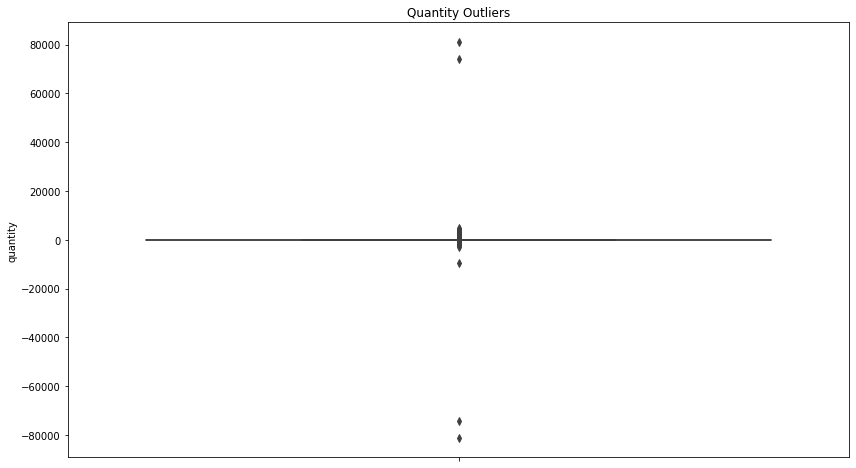

In [175]:
#Showing quantity outliers
plt.figure(figsize=(14,8))
plt.title("Quantity Outliers")
ax = sns.boxplot(y=data['quantity'])
# ax.set_ylim(-20000,20000)

(-50, 50)

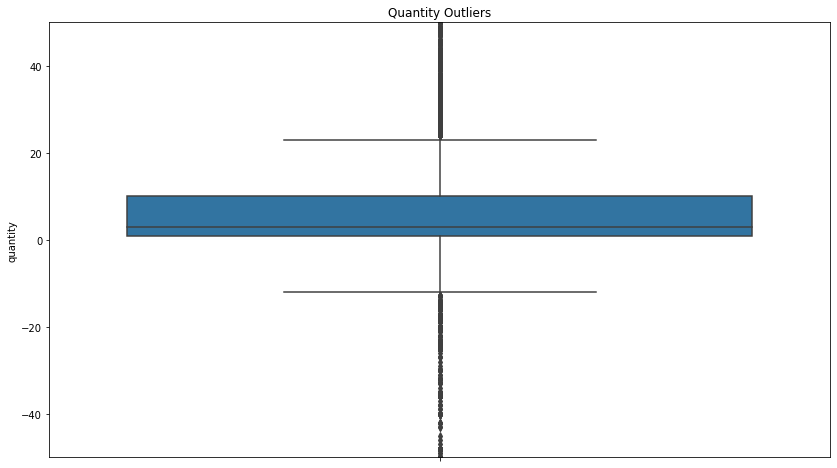

In [176]:
# Zooming into quantity outlier
plt.figure(figsize=(14,8))
plt.title("Quantity Outliers")
ax = sns.boxplot(y=data['quantity'])
ax.set_ylim(-50,50)

There are 4 records which are extreme outliers, 3 of them were cancelled/refunded orders (any thing above ±20k is an extreme outlier), but im not going to remove them atm as the ecommerece business model might be aiming for such big deals. Now as we can see that there are so many outliers according to Interquartile Rule to Find Outliers, but implementing it here wont make sense here because there are so many like this and these "outliers" might be the norm for the business in the longterm, depeneds what is their business model.. I will leave the outliers as they are atm.
Now after showing the outliers, I will focus into examininig the refunded orders in a deeper manner. see " Examining refunded orders"

### Examining cancelled/refunded orders 

Let's rsearch the cancelled/refunded orders and provide insights to the e-commerce business

In [177]:
data[data['quantity']<0].sample(5)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
36301,C539448,20803,SMALL PINK GLASS SUNDAE DISH,-36,2018-12-15 16:25:00,0.42,15157
440252,C574524,22947,WOODEN ADVENT CALENDAR RED,-2,2019-11-02 13:53:00,7.95,17841
88063,C543755,22617,BAKING SET SPACEBOY DESIGN,-3,2019-02-09 14:48:00,4.95,14304
246910,C558745,21844,RED RETROSPOT MUG,-1,2019-06-29 17:02:00,2.95,14415
246780,C558727,20914,SET/5 RED RETROSPOT LID GLASS BOWLS,-1,2019-06-29 14:35:00,2.55,12709


Notice that all of the invoice_no starts with the letter "C" 

In [178]:
# Checking cancelled/refunded orders general information to grasp what is going on for all of the records
cnt_order = data[data['quantity']>0]['invoice_no']
cnt_refund = data[data['quantity']<0]['invoice_no']


print("Total records : ",len(cnt_order))
print("Total Refund records : ",len(cnt_refund))
print("%Refund (of record) : ",len(cnt_refund)/len(cnt_order)*100,"%")

Total records :  530103
Total Refund records :  9288
%Refund (of record) :  1.752112325340547 %


In [179]:
# Showing the canceled orders percentage from the overall records and confirming the above %refund rate to the 
# invoice_no that starts with "C"
order_canceled = data['invoice_no'].apply(lambda x:int('C' in x))
n1 = order_canceled.sum()
n2 = data.shape[0]
print('Number of orders canceled: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))

Number of orders canceled: 9288/539391 (1.72%) 


In [180]:
# Adding a column to show if the order is refunded by a boolean True or False result for each order: (True = negative quantity) or not refunded (False = positive quantity)
# This will help to visualize the data soon
data['RefundFlg'] = data['quantity']<0

In [181]:
# Confirming the above numbers again by using the value_counts()
data['RefundFlg'].value_counts()

False    530103
True       9288
Name: RefundFlg, dtype: int64

In [182]:
# Selcting the regular orders (positive quantity) and counting the unique orders of such items.
prod_order = data[data['quantity']>0].groupby(['stock_code','description']).invoice_no.nunique().sort_values(ascending = False).reset_index()
prod_order = prod_order.rename(columns = {'invoice_no' : 'complete_order'})
print("The number of unique items which were in the positive orders is: ",prod_order.shape[0])
prod_order.head()

The number of unique items which were in the positive orders is:  3921


,stock_code,description,complete_order
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2198
1,85099B,JUMBO BAG RED RETROSPOT,2089
2,22423,REGENCY CAKESTAND 3 TIER,1988
3,47566,PARTY BUNTING,1685
4,20725,LUNCH BAG RED RETROSPOT,1565


In [183]:
# Selcting the canclled/refunded orders (negative quantity) and counting the unique orders of such items.
prod_order_refund = data[data['quantity']<0].groupby(['stock_code','description']).invoice_no.nunique().sort_values(ascending = False).reset_index()
prod_order_refund = prod_order_refund.rename(columns = {'invoice_no' : 'refunded_order'})
print("The number of unique items which were in the cancelled orders is : ",prod_order_refund.shape[0])
prod_order_refund.head()

The number of unique items which were in the cancelled orders is :  1947


,stock_code,description,refunded_order
0,M,Manual,223
1,22423,REGENCY CAKESTAND 3 TIER,180
2,POST,POSTAGE,124
3,22960,JAM MAKING SET WITH JARS,87
4,22720,SET OF 3 CAKE TINS PANTRY DESIGN,73


The items in the prod_order_refund should be looked into further, so the business can understand why the order were cancelled so they can avoid such events. But let's first compare it to the previous table (prod_order), so joining them together would be a the way..

In [184]:
# Joining the prod_order on the prod_order_refund order using the left join.
join_prod_order = prod_order.merge(prod_order_refund,left_on = ['stock_code','description'],right_on = ['stock_code','description'],how = 'left')
join_prod_order.sample(5)

,stock_code,description,complete_order,refunded_order
1698,15056n,EDWARDIAN PARASOL NATURAL,84,NaN
1387,20986,BLUE CALCULATOR RULER,113,NaN
1572,17012D,ORIGAMI ROSE INCENSE/CANDLE SET,97,NaN
1505,21617,4 LILY BOTANICAL DINNER CANDLES,102,NaN
850,22635,CHILDS BREAKFAST SET DOLLY GIRL,194,7.0


Now we can compare the refunded_order with the complete_order and see what is the percentage % from the total_order

Note that the stock_code which don't have refunded there are Nan values overther

In [185]:
join_prod_order['total_orders'] = join_prod_order['complete_order'] + join_prod_order['refunded_order']

In [186]:
join_prod_order.head()

,stock_code,description,complete_order,refunded_order,total_orders
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2198,42.0,2240.0
1,85099B,JUMBO BAG RED RETROSPOT,2089,43.0,2132.0
2,22423,REGENCY CAKESTAND 3 TIER,1988,180.0,2168.0
3,47566,PARTY BUNTING,1685,20.0,1705.0
4,20725,LUNCH BAG RED RETROSPOT,1565,43.0,1608.0


In [187]:
# Calculating how much percentage we have for refunded orders over the total order
join_prod_order['%refunded'] = join_prod_order['refunded_order']/join_prod_order['total_orders']*100
join_prod_order = join_prod_order.sort_values(by = '%refunded',ascending = False)
join_prod_order.head()

,stock_code,description,complete_order,refunded_order,total_orders,%refunded
3730,AMAZONFEE,AMAZON FEE,2,32.0,34.0,94.117647
3718,S,SAMPLES,2,17.0,19.0,89.473684
3877,20703,BLUE PADDED SOFT MOBILE,1,3.0,4.0,75.000000
3120,BANK CHARGES,Bank Charges,11,25.0,36.0,69.444444
3878,79323P,PINK CHERRY LIGHTS,1,2.0,3.0,66.666667


In [188]:
# Calculating how much percentage we have for complete orders over the total order
join_prod_order['%complete'] = join_prod_order['complete_order']/join_prod_order['total_orders']*100
join_prod_order = join_prod_order.sort_values(by = '%refunded',ascending = False)
join_prod_order.head()

,stock_code,description,complete_order,refunded_order,total_orders,%refunded,%complete
3730,AMAZONFEE,AMAZON FEE,2,32.0,34.0,94.117647,5.882353
3718,S,SAMPLES,2,17.0,19.0,89.473684,10.526316
3877,20703,BLUE PADDED SOFT MOBILE,1,3.0,4.0,75.000000,25.000000
3120,BANK CHARGES,Bank Charges,11,25.0,36.0,69.444444,30.555556
3878,79323P,PINK CHERRY LIGHTS,1,2.0,3.0,66.666667,33.333333


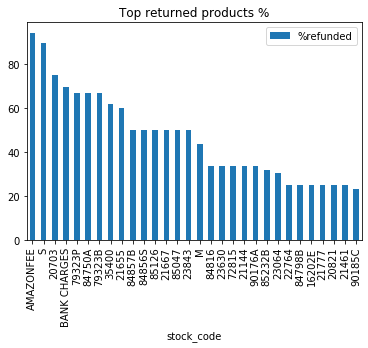

In [189]:
# Showing the items' stock_code which got refunded mostly 
top_perc_refunded = join_prod_order.sort_values(by = '%refunded',ascending = False).head(30)
top_perc_refunded.plot(x='stock_code', y='%refunded',  kind='bar')
plt.title('Top returned products %');

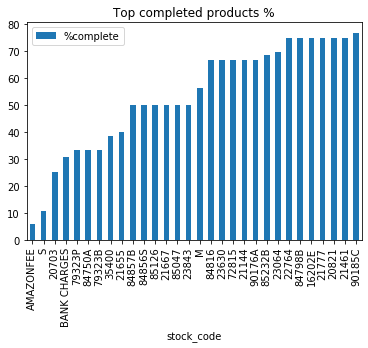

In [190]:
# Showing the items' stock_code which got complete mostly 
top_perc_refunded.plot(x='stock_code', y='%complete',  kind='bar')
plt.title('Top completed products %');

The plot shows the top refunded orders %, these items should be investigated further by the business, but let's compare the same stock_code with the %complete and put them into one plot

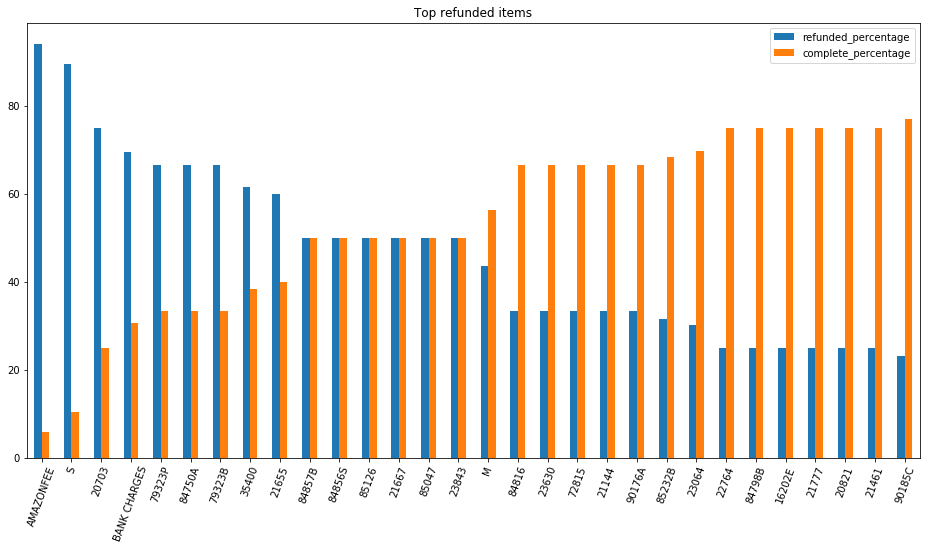

In [191]:
# Comparing the top 30 %refunded items with the %compelte
refunded_percentage = top_perc_refunded['%refunded'].tolist()
complete_percentage = top_perc_refunded['%complete'].tolist()
index = top_perc_refunded['stock_code'].tolist()
top_15_refunded_percentage = pd.DataFrame({'refunded_percentage': refunded_percentage,
                   'complete_percentage': complete_percentage}, index=index)
ax = top_15_refunded_percentage.plot.bar(rot=70, title="Top refunded items",figsize=(16,8))

The grouped bar chart above compares between the % of the refunded (cancelled) and complete order's items. This will help us to compare the most refunded products % with the same product's non-refunded (complete) %. As we can see: 

1. There are 9 item whose %refunded > %complete

2. There are 6 products whose %refunded = %complete

3. There rest of the products have %refunded < %complete

below is the list which I recommend the ecommerce business to research and understand the reasons behind these refunded products. Note the top %refunded might not even be a product as the description of it is "AMAZON FEE". This might be crucial to the data base management and the business should understand why did this stock_code came here and try to spot other similar examples. 

In [192]:
# list which I recommend the ecommerce business to research and understand the reasons behind these refunded products.
join_prod_order[["stock_code", "description", "%refunded", "%complete"]].head(30)

,stock_code,description,%refunded,%complete
3730,AMAZONFEE,AMAZON FEE,94.117647,5.882353
3718,S,SAMPLES,89.473684,10.526316
3877,20703,BLUE PADDED SOFT MOBILE,75.000000,25.000000
3120,BANK CHARGES,Bank Charges,69.444444,30.555556
3878,79323P,PINK CHERRY LIGHTS,66.666667,33.333333
3905,84750A,PINK SMALL GLASS CAKE STAND,66.666667,33.333333
3879,79323B,BLACK CHERRY LIGHTS,66.666667,33.333333
3425,35400,WOODEN BOX ADVENT CALENDAR,61.538462,38.461538
3700,21655,HANGING RIDGE GLASS T-LIGHT HOLDER,60.000000,40.000000
3793,23843,"PAPER CRAFT , LITTLE BIRDIE",50.000000,50.000000


In [193]:
# Showing the canceled orders percentage from the overall recordse
order_canceled = data['invoice_no'].apply(lambda x:int('C' in x)) 
n1 = order_canceled.sum()
n2 = data.shape[0]
print('Number of orders canceled: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))

Number of orders canceled: 9288/539391 (1.72%) 


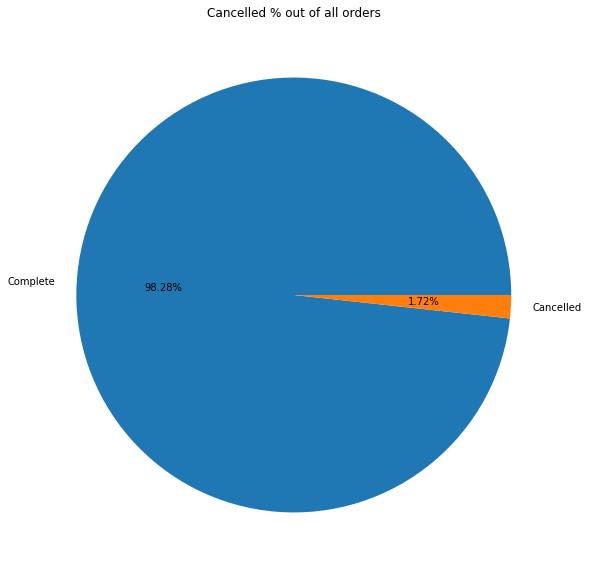

In [194]:
# Plotting a pie chart to remind us the refunded (cancelled) items orders share from the overall total orders is still miniscule 
# https://www.w3schools.com/python/matplotlib_pie_charts.asp
# http://www.learningaboutelectronics.com/Articles/How-to-create-a-pie-chart-in-matplotlib-with-Python.php#:~:text=To%20add%20percentages%20to%20each,percentage%20to%20the%20tenth%20place.
completed_perc = (n2-n1)/n2*100
cancelled_perc = n1/n2*100
y = np.array([completed_perc, cancelled_perc])
mylabels = ["Complete", "Cancelled"]
plt.figure(figsize=(20,10))
plt.title("Cancelled % out of all orders")
plt.pie(y, labels = mylabels, autopct='%1.2f%%')
plt.show()

To conclude, the refunded (cancelled) items orders share from the overall total orders is still miniscule. However, to improve the customer experience and reduce churn rate, I recommend the business to look into the refunded orders, and to focus mainly on the top %refunded 30 list that I provided above.

# Step 3. Analyzing the data and providing insights

After finishing to analyze the refunded products, I will filter them out and slice the data to work with complete orders from now on. 

In [195]:
# Slicing the data by keeping the positive quantity only
datastats = data.copy() # copying the data for the statistcial hypotheses as we need negative quantity values for it
data = data.loc[(data['quantity'] > 0)]

### Orders timeframe analysis

#### Examining purchases dates and highlight where it is trending and explain possible reasons (if any)

Let's start by deleting the  quantity and unit_price values, because we already finished analyzing the cancelled orders and now we want to examine further data on sales and other stuff

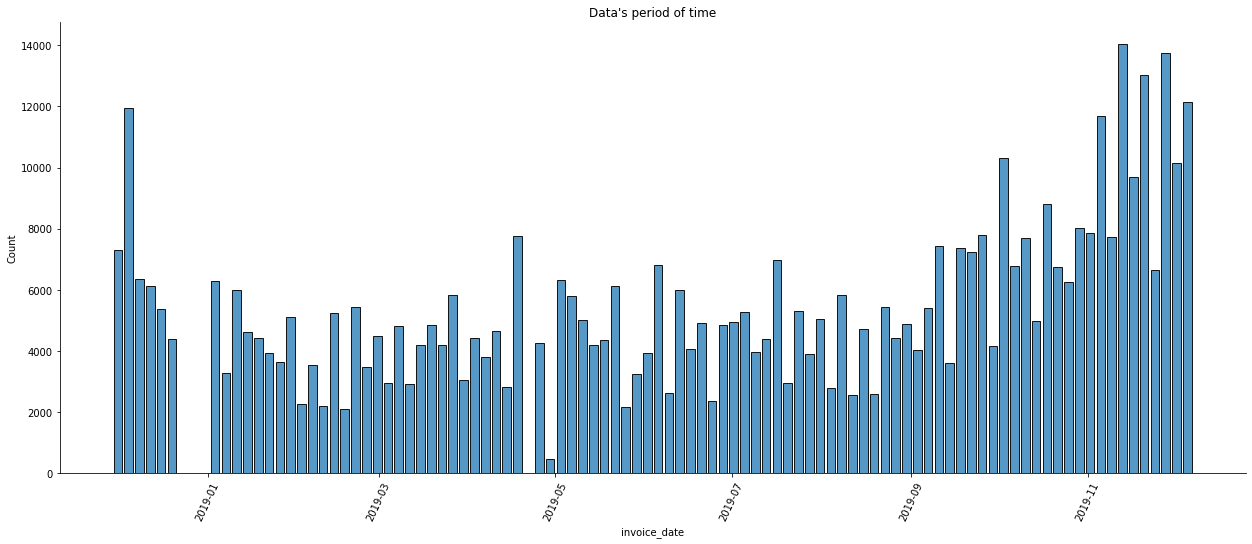

In [196]:
# Showing the dates range
sns.displot(data, x="invoice_date", shrink=.8, bins=100, height=7, aspect=2.5)
plt.title("Data's period of time")
plt.xticks(rotation=65);

Orders placments surged in the end of 2018, then it stabalized throughout the year, then it order placements soared again starting from September, and in the end of the year there was a tremendous amount of orders, maybe because it was a holiday season.

In [197]:
data['invoice_date'].describe()

count                  530103
unique                  18499
top       2019-10-29 14:41:00
freq                     1114
first     2018-11-29 08:26:00
last      2019-12-07 12:50:00
Name: invoice_date, dtype: object

It's nice to see the distribution of invoice_date count: 

The firt invoice was placed in 2018-11-29 08:26:00

The last invlice was placed in 2019-12-07 12:50:00

So the invoice_date range is almost 1 year. 

There are periods where no orders were placed. This was in the end of 2018. Maybe due to business operation or missing data. It's best to report on this to the business. 

In [198]:
######we Splitting date into multiples columns day, week, yearmonth, and hours in which orders are placed

data['yearmonth'] = data['invoice_date'].apply(lambda x: (100*x.year) + x.month) ### year and month date colum like 201811
data['Week'] = data['invoice_date'].apply(lambda x: x.strftime('%W'))### extract week from date 
data['day'] = data['invoice_date'].apply(lambda x: x.strftime('%d'))### extract day from date
data['Weekday'] = data['invoice_date'].apply(lambda x: x.strftime('%w'))### extract weekday from date 
data['hour'] = data['invoice_date'].apply(lambda x: x.strftime('%H'))### extract hours from date
data.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,RefundFlg,yearmonth,Week,day,Weekday,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850,False,201811,48,29,4,08
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850,False,201811,48,29,4,08
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850,False,201811,48,29,4,08
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850,False,201811,48,29,4,08
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850,False,201811,48,29,4,08


#### Frequency of order by Month

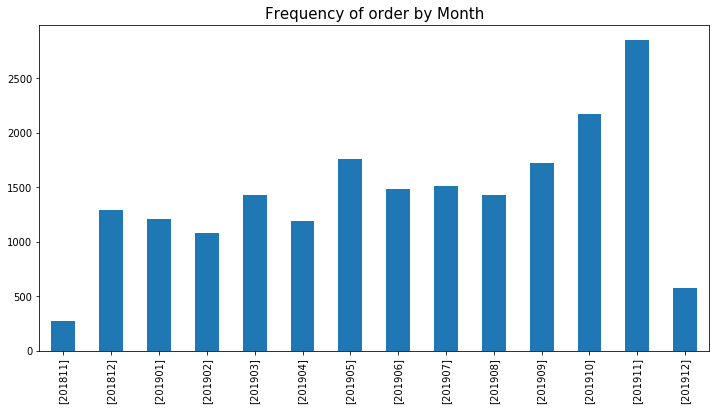

In [199]:
# Frequency of order by Month
plt.figure(figsize=(12,6))
plt.title("Frequency of order by Month", fontsize=15)
InvoiceDate = data.groupby(['invoice_no'])['yearmonth'].unique()
InvoiceDate.value_counts().sort_index().plot.bar();

We can see that the order number have almost gradually increased from month to month. The drop in the last month is due to the lack of data in Decemenber 2019 (We saw this in the "Examining purchases dates" part)

#### Frequency of order by Week

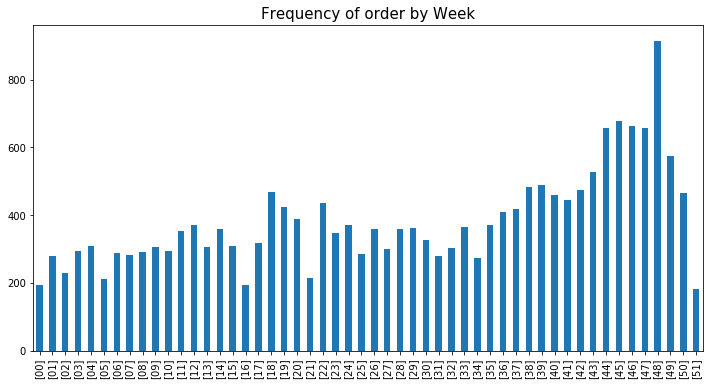

In [200]:
plt.figure(figsize=(12,6))
plt.title("Frequency of order by Week", fontsize=15)
InvoiceDate = data.groupby(['invoice_no'])['Week'].unique()
InvoiceDate.value_counts().sort_index().plot.bar();

This graph is very similar to the monthly cohort, but it's more in details since we are showing weekly cohort

#### Frequency of order by day


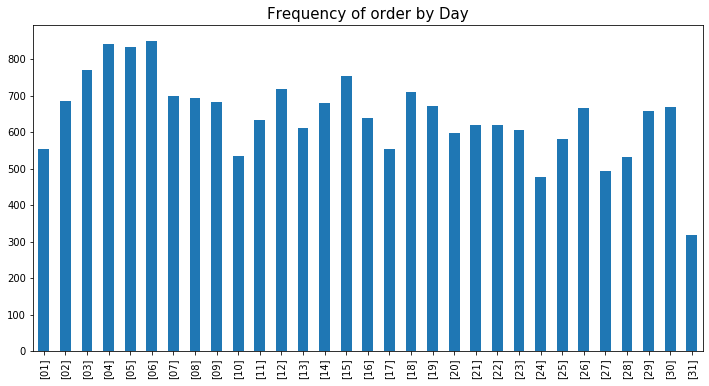

In [201]:
#Frequency of order by day
plt.figure(figsize=(12,6))
plt.title("Frequency of order by Day", fontsize=15)
InvoiceDate = data.groupby(['invoice_no'])['day'].unique()
InvoiceDate.value_counts().sort_index().plot.bar();

We can see that most of the orders comes in the beggining in the month (starting from the second day), then it gradually decrease. Probably because people receive their salary in the beggining of the month, and by the end of the month they prefer not to spend money, this is related to people "timeline spending behaviour"s. The client maybe should try to find a good time to market expensive products, so by the begginng of the month, users will be willing to buy such expensive products.

#### Frequency of order by Weekdays


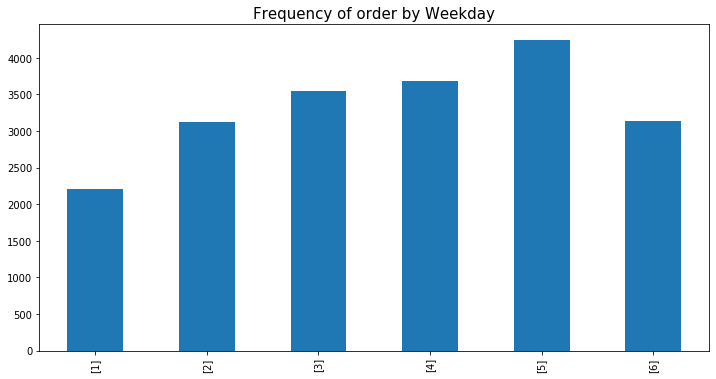

In [202]:
# Frequency of order by Weekdays
plt.figure(figsize=(12,6))
plt.title("Frequency of order by Weekday", fontsize=15)
InvoiceDate = data.groupby(['invoice_no'])['Weekday'].unique()
InvoiceDate.value_counts().sort_index().plot.bar();

This weekday plot shows another interesting behaviour, the day where people order most is the 5th day (Friday), which is the holiday in most countries, also maybe because they allow themselves to have treat after a "long working week". Also many people order midweek. 

This graph is crucial because it will help the marketing team to come up with a better marketing targted campaigns startegies

#### Frequency of order by hour of day

---




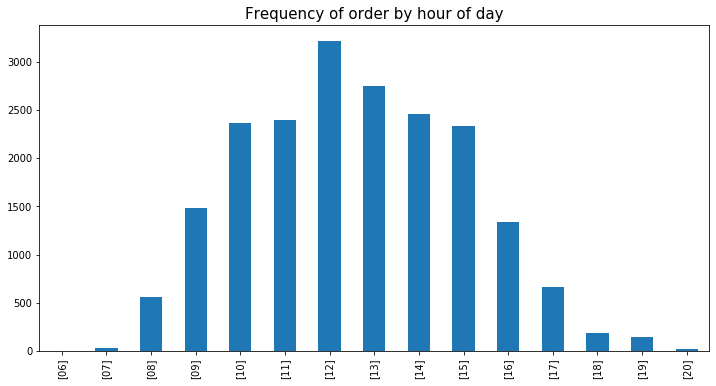

In [203]:
#Frequency of order by hour of day
plt.figure(figsize=(12,6))
plt.title("Frequency of order by hour of day", fontsize=15)
InvoiceDate = data.groupby(['invoice_no'])['hour'].unique()
(InvoiceDate.value_counts()).iloc[0:-1].sort_index().plot.bar();

Very similar to the weekday, the marketing team should be aware of the hours in which customers place their orders, so the e-commerce business the marketing team can come up with a better marketing targted campaigns startegies

General conclusion on the order timeframe analysis:

The marketing team should adjust their marketing campaigns according to the customer surf hours and the hours and events where customer place their orders most frequently

### Top selling products

In [204]:
top_selling_products = pd.DataFrame((data.groupby(['description'])['stock_code'].count())).sort_values('stock_code', ascending = False).head(15).reset_index()
top_selling_products.head(15)

,description,stock_code
0,WHITE HANGING HEART T-LIGHT HOLDER,2332
1,JUMBO BAG RED RETROSPOT,2112
2,REGENCY CAKESTAND 3 TIER,2017
3,PARTY BUNTING,1706
4,LUNCH BAG RED RETROSPOT,1595
5,ASSORTED COLOUR BIRD ORNAMENT,1489
6,POPCORN HOLDER,1426
7,SET OF 3 CAKE TINS PANTRY DESIGN,1399
8,PACK OF 72 RETROSPOT CAKE CASES,1370
9,LUNCH BAG BLACK SKULL.,1328


In [205]:
# Overall top selling products
top_15_product = data['description'].value_counts().reset_index().head(15)
top_15_product = top_15_product.rename(columns={'index': 'stock_description', 'description': 'sale_count'})
top_15_product

,stock_description,sale_count
0,WHITE HANGING HEART T-LIGHT HOLDER,2332
1,JUMBO BAG RED RETROSPOT,2112
2,REGENCY CAKESTAND 3 TIER,2017
3,PARTY BUNTING,1706
4,LUNCH BAG RED RETROSPOT,1595
5,ASSORTED COLOUR BIRD ORNAMENT,1489
6,POPCORN HOLDER,1426
7,SET OF 3 CAKE TINS PANTRY DESIGN,1399
8,PACK OF 72 RETROSPOT CAKE CASES,1370
9,LUNCH BAG BLACK SKULL.,1328


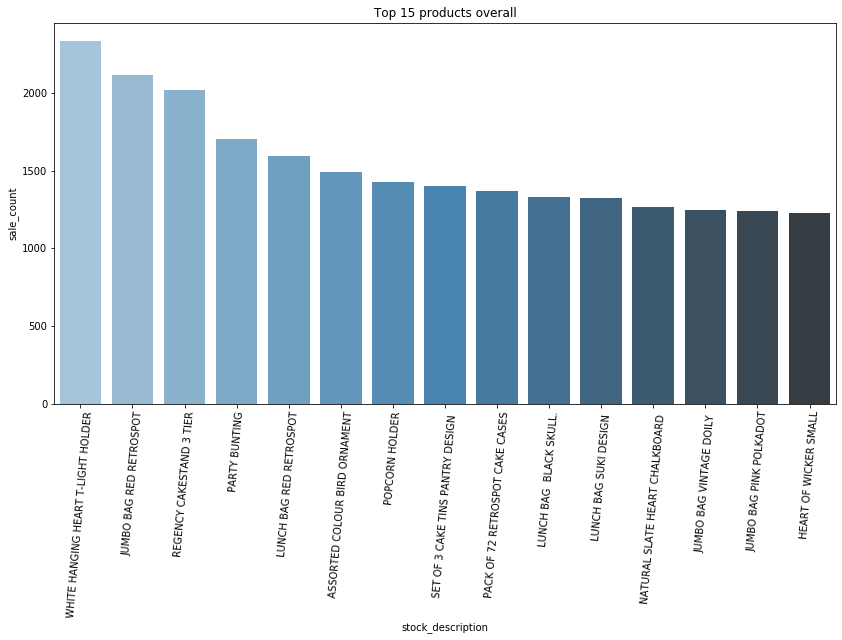

In [206]:
# plotting a barplot to visualize the above list
plt.figure(figsize=(14,7))
ax = sns.barplot(x="stock_description", y="sale_count", data=top_15_product,
                 palette="Blues_d")
plt.title("Top 15 products overall")
plt.xticks(rotation=85);

These are the top sold products overall

### Top repurchased products by customers

Herer I will investigate which products have high demand by the business' loyal customers..

In [207]:
# Sorting and counting the invoice_no for each stock_code
df_sort = data.sort_values(['customer_id', 'stock_code', 'invoice_date']) # Sorting to see if the same customer repurchased the same product considering the date
df_sort_shift1 = df_sort.shift(1) # shifting after the sorting to help us analyze which products were repurchased (see next step)
df_sort_reorder = df_sort.copy()
#We assigned 1 to the repurchased, and 0 to the products which were not repurchased by the same customer
df_sort_reorder['repurchased'] = np.where(((df_sort['stock_code'] == df_sort_shift1['stock_code']) & (df_sort['customer_id'] == df_sort_shift1['customer_id'])), 1,0) 
df_sort_reorder.head(7)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,RefundFlg,yearmonth,Week,day,Weekday,hour,repurchased
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2019-01-16 10:01:00,1.04,12346,False,201901,02,16,3,10,0
148306,549222,16008,SMALL FOLDING SCISSOR(POINTED EDGE),24,2019-04-05 10:43:00,0.25,12347,False,201904,13,05,5,10,0
220583,556201,17021,NAMASTE SWAGAT INCENSE,36,2019-06-07 13:01:00,0.30,12347,False,201906,22,07,5,13,0
148289,549222,20665,RED RETROSPOT PURSE,6,2019-04-05 10:43:00,2.95,12347,False,201904,13,05,5,10,0
72249,542237,20719,WOODLAND CHARLOTTE BAG,10,2019-01-24 14:30:00,0.85,12347,False,201901,03,24,4,14,0
286629,562032,20719,WOODLAND CHARLOTTE BAG,10,2019-07-31 08:48:00,0.85,12347,False,201907,30,31,3,08,1
429001,573511,20719,WOODLAND CHARLOTTE BAG,10,2019-10-29 12:25:00,0.85,12347,False,201910,43,29,2,12,1


In [208]:
# Seeing how many products were repurchased and how many were not by the same customer 
df_sort_reorder['repurchased'].value_counts()

0    270199
1    259904
Name: repurchased, dtype: int64

There were 270199 products that was purchased only once by the same customer, and 259904 repurchased more than once by the same customer.

This is important, because the ecommerece product model is different from website to website. Think about an online retail store where you buy your home supllies and groceries from. You'll probably going to conduct an online repurchase for toliet paper again and again from that online retail store.. So the message is, this ecommerce business seem to have a product model where it focuses on repurchases.. I usually do not buy the same product from ebay, but maybe many customers do the same purchases again and again for personal or business reasons. 

This shows that the ecommerce business have two types of customers:

1. One time product purchase customers: They are searching and trying out products

2. Repurchase again and again customers: They know what they want and they are satisfied and will keep buying again for personal or business needs

In [209]:
# Top 15 repurchased produts (by loyal customers who repurchased more than 1 time)
top_products = pd.DataFrame((df_sort_reorder.groupby(['description','stock_code'])['repurchased'].sum())).sort_values('repurchased', ascending = False).head(15).reset_index()
top_products.head(15)

,description,stock_code,repurchased
0,JUMBO BAG RED RETROSPOT,85099B,1476
1,WHITE HANGING HEART T-LIGHT HOLDER,85123A,1408
2,REGENCY CAKESTAND 3 TIER,22423,1135
3,LUNCH BAG RED RETROSPOT,20725,1062
4,POPCORN HOLDER,22197,1018
5,PARTY BUNTING,47566,997
6,LUNCH BAG SUKI DESIGN,22383,891
7,LUNCH BAG BLACK SKULL.,20727,869
8,JUMBO BAG PINK POLKADOT,22386,865
9,JUMBO STORAGE BAG SUKI,21931,863


In [210]:
# Preparing the string for the graph x-axis
top_products["stock_description"] = top_products["stock_code"].astype(str) + ' - ' +top_products["description"]

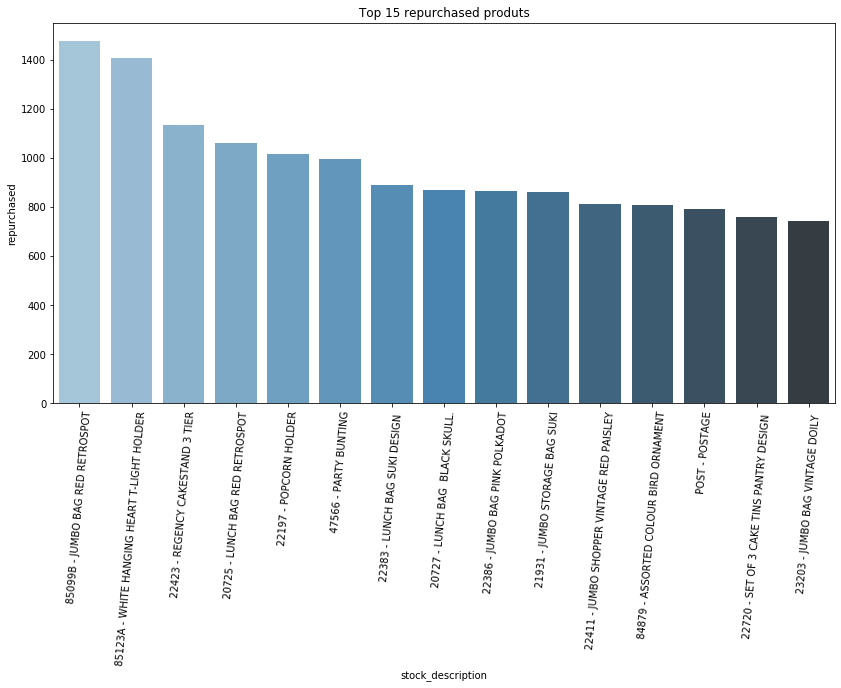

In [211]:
# plotting a barplot to visualize the above list
plt.figure(figsize=(14,7))
ax = sns.barplot(x="stock_description", y="repurchased", data=top_products,
                 palette="Blues_d")
plt.title("Top 15 repurchased produts")
plt.xticks(rotation=85);

The above plot shows the top 15 repurchased produts sold, it's crucial to understand these products were repurchased by loyal customers only.

General summary: 
It should be noted that should note that the ecommerece business seem not only work as B2C, but also B3B as the "WHITE HANGING HEART T-LIGHT HOLDER" and "JUMBO BAG RED RETROSPOT" was repurchased so many times. 

### Sales/Revenue Analysis

In [212]:
#calculating totalbill for each invoice
df_sort_reorder['total_bill'] = df_sort_reorder['quantity']*df_sort_reorder['unit_price'] 

#### Monthly revenue analysis by turning customers into loyal users

In [213]:
df_sort_reorder.head(1)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,RefundFlg,yearmonth,Week,day,Weekday,hour,repurchased,total_bill
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2019-01-16 10:01:00,1.04,12346,False,201901,02,16,3,10,0,77183.6


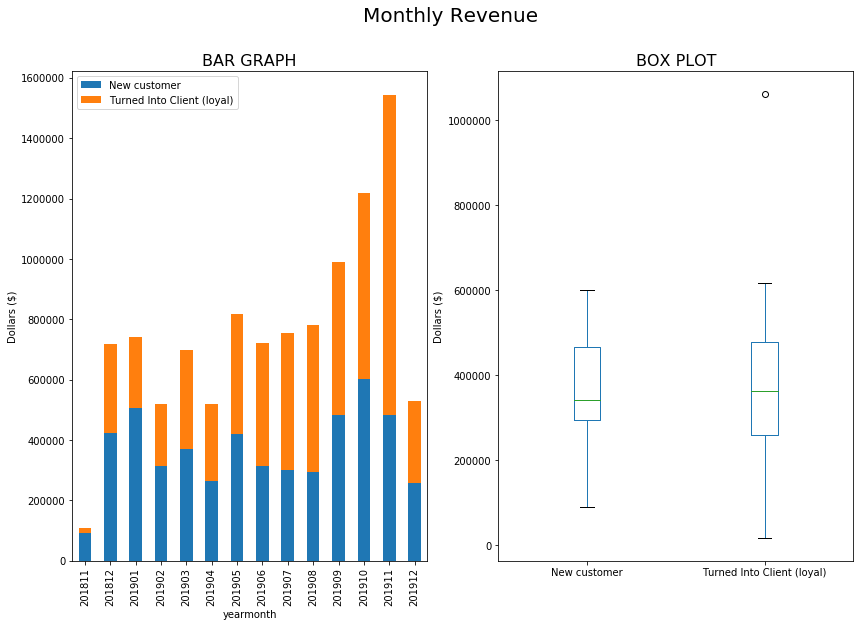

In [214]:
# Comparing new_users and loyal customer mothly revenue
monthly_new_users = (df_sort_reorder[df_sort_reorder['repurchased'] == 0 ].groupby(['yearmonth'])['total_bill'].sum())# new users aggregated by yearmonth and total_bill 
monthly_loyal = (df_sort_reorder[df_sort_reorder['repurchased'] == 1 ].groupby(['yearmonth'])['total_bill'].sum())# if a person re ordered again in  a yearmonth counting sum for it.

monthly_revenue = pd.DataFrame([monthly_new_users , monthly_loyal], index=['New customer', 'Turned Into Client (loyal)']).transpose() # Creating dataframe from monthly_new_users and monthly_loyal then transposing the dataframe so we can plot
# Subplotting 2 diagrams
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,9))
# Bar graph
fig.suptitle('Monthly Revenue', fontsize=20)
axes[0].set_title("BAR GRAPH", fontsize=16) 
axes[1].set_title("BOX PLOT", fontsize=16) 
axes[0].set( ylabel='Dollars ($)')
axes[1].set( ylabel='Dollars ($)')
monthly_revenue.plot.bar(stacked=True, ax=axes[0])

# Boxplot for counted values.
monthly_revenue.plot.box(ax=axes[1]);

**Monthly revenue summary:**

October 2019 was the best month for the first buyers

Novermber 2019 was the best month for the customer retention and turning users into clients (people who reordered)

The plotbox is showing that users who buy once are usually turned into clients later on in the year, but ofcourse some dont which is shown in the plotbox differences

#### Daily revenue analysis by turning customers into loyal users

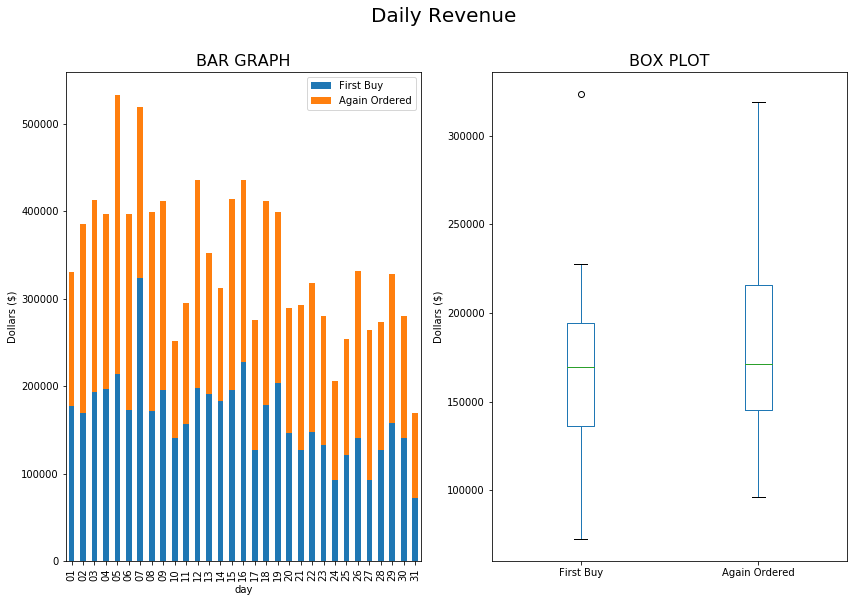

In [215]:
# Comparing new_users and loyal customer daily revenue

daily_new_users = (df_sort_reorder[df_sort_reorder['repurchased'] == 0 ].groupby(['day'])['total_bill'].sum())
daily_loyal = (df_sort_reorder[df_sort_reorder['repurchased'] == 1 ].groupby(['day'])['total_bill'].sum())

daily_revenue = pd.DataFrame([daily_new_users , daily_loyal], index=['First Buy', 'Again Ordered']).transpose()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,9))
fig.suptitle('Daily Revenue', fontsize=20)
axes[0].set_title("BAR GRAPH", fontsize=16) 
axes[1].set_title("BOX PLOT", fontsize=16) 
axes[0].set( ylabel='Dollars ($)')
axes[1].set( ylabel='Dollars ($)')
daily_revenue.plot.bar(stacked=True, ax=axes[0])
daily_revenue.plot.box(ax=axes[1]);

**Daily revenue summary:**

clients usually buy more in the beggining of the month, then it gradually drops when we reach the final days of the month

The plotbox is showing that users who buy once are usually turned into clients in the same month

#### Weekly revenue analysis by turning customers into loyal users

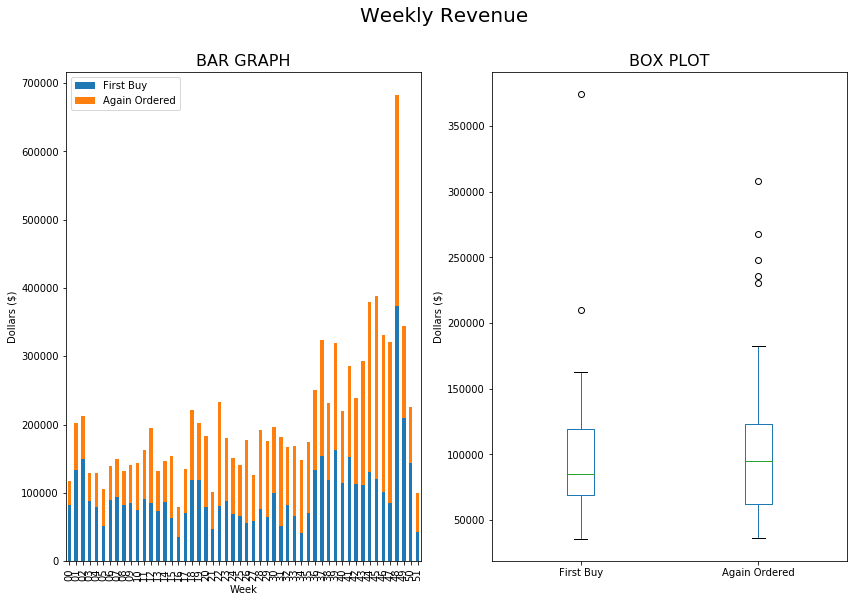

In [216]:
# Comparing new_users and loyal customer weekly revenue

weekly_new_users = (df_sort_reorder[df_sort_reorder['repurchased'] == 0 ].groupby(['Week'])['total_bill'].sum())
weekly_loyal = (df_sort_reorder[df_sort_reorder['repurchased'] == 1 ].groupby(['Week'])['total_bill'].sum())

weekly_revenue = pd.DataFrame([weekly_new_users , weekly_loyal], index=['First Buy', 'Again Ordered']).transpose()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,9))
fig.suptitle('Weekly Revenue', fontsize=20)
axes[0].set_title("BAR GRAPH", fontsize=16) 
axes[1].set_title("BOX PLOT", fontsize=16) 
axes[0].set( ylabel='Dollars ($)')
axes[1].set( ylabel='Dollars ($)')
weekly_revenue.plot.bar(stacked=True, ax=axes[0])
weekly_revenue.plot.box(ax=axes[1]);

**Weekly revenue summary:**

We can see siilar patern to the monthly revenue summary. There is a gradual increase in orders, so growth is going well! We can see that in the end of the year there was unsual sales growth, it might be due to christmas, but we have to look into the dates after christmas to see if that was the reason or it's just more growth 

The plotbox is simlar to the monthly plotbox: users who buy once are usually turned into clients later on in the year, but ofcourse some dont which is shown in the plotbox differences

### Product categorization (Main and assortment) using the Association Rule Mining via Apriori Algorithm

**Brief guide to the Association Rule Mining:**


Association rule mining is a technique to identify underlying relations between different items. Take an example of a Super Market where customers can buy variety of items. Usually, there is a pattern in what the customers buy. For instance, mothers with babies buy baby products such as milk and diapers. Damsels may buy makeup items whereas bachelors may buy beers and chips etc. In short, transactions involve a pattern. More profit can be generated if the relationship between the items purchased in different transactions can be identified.

Using Apriori Algorithm will help us conduct Market Basket Analysis (to find the main and addional assortment): For each product we going to find the relationship with the invoice_no. The relationship between products is going to be described by the following parameters; 1. Support, 2. Confidence, 3. Lift:
NOTE: I will focus on the Support parameter rate only for this project (further explaintion can be find below)

1. **Support:** 

Support refers to the default popularity of an item and can be calculated by finding number of transactions containing a particular item divided by total number of transactions. Suppose we want to find support for item B. Example:

Support(B) = (Transactions containing (B))/(Total Transactions)

Support(Ketchup) = (Transactions containingKetchup)/(Total Transactions)

Support(Ketchup) = 100/1000
                 = 10%

2. *Confidence: Confidence refers to the likelihood that an item B is also bought if item A is bought. It can be calculated by finding the number of transactions where A and B are bought together, divided by total number of transactions where A is bought. Mathematically, it can be represented as:
Confidence(A→B) = (Transactions containing both (A and B))/(Transactions containing A)*


3. *Lift: Lift(A -> B) refers to the increase in the ratio of sale of B when A is sold. Lift(A –> B) can be calculated by dividing Confidence(A -> B) divided by Support(B). Mathematically it can be represented as:
Lift(A→B) = (Confidence (A→B))/(Support (B))*

NOTE: I only used the Support parameter to show categorization of Main and Assortment. Confidence and Lift can be informative too, but being stright forward is better and no need for deeper analysis for this project 
I've studied and copied the code from the following sources:
1. https://stackabuse.com/association-rule-mining-via-apriori-algorithm-in-python/
2. https://pbpython.com/market-basket-analysis.html

In [217]:
# Prepraring the data (df_sort_reorder which is preprocessed already) for Apriori Algorithm:
# 1. preprocessing or data cleaning. for example a description can have exra spaces in left or right, we should remove those
# 2. Cleaning missing values from invoice_no: we should drop missing values from invoice_no because it will clean the data for the Apriori Algorithm so each invoice_no will find relation with the description/stock_code 
#Like that we should remove cancel or credit records because those are not helpful in assortment we have performed all those steps here
df_sort_reorder['description'] = df_sort_reorder['description'].str.strip()#removes spaces if exist on left and right of the string
df_sort_reorder.dropna(axis=0, subset=['invoice_no'], inplace=True)#drop the rows that don’t have invoice numbers
df_sort_reorder = df_sort_reorder[~df_sort_reorder['invoice_no'].str.contains('C')]#remove the credit transactions which contains invoice numbers containing
df_sort_reorder

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,RefundFlg,yearmonth,Week,day,Weekday,hour,repurchased,total_bill
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2019-01-16 10:01:00,1.04,12346,False,201901,02,16,3,10,0,77183.60
148306,549222,16008,SMALL FOLDING SCISSOR(POINTED EDGE),24,2019-04-05 10:43:00,0.25,12347,False,201904,13,05,5,10,0,6.00
220583,556201,17021,NAMASTE SWAGAT INCENSE,36,2019-06-07 13:01:00,0.30,12347,False,201906,22,07,5,13,0,10.80
148289,549222,20665,RED RETROSPOT PURSE,6,2019-04-05 10:43:00,2.95,12347,False,201904,13,05,5,10,0,17.70
72249,542237,20719,WOODLAND CHARLOTTE BAG,10,2019-01-24 14:30:00,0.85,12347,False,201901,03,24,4,14,0,8.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42057,539958,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,1,2018-12-21 13:26:00,42.55,unidentified,False,201812,51,21,5,13,0,42.55
178556,552232,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,1,2019-05-04 15:54:00,41.67,unidentified,False,201905,17,04,6,15,1,41.67
239744,558066,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,1,2019-06-22 15:45:00,41.67,unidentified,False,201906,24,22,6,15,1,41.67
245516,558614,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,1,2019-06-28 15:56:00,41.67,unidentified,False,201906,25,28,5,15,1,41.67


#### Which products are more often combined with others (main and additional assortment)?

In [218]:
# Showing the columns nunique values which may be used for the Apriori Algorithm:
print("We have unique: ")
print("invoice_no : ", df_sort_reorder['invoice_no'].nunique())
print("stock_code : ",df_sort_reorder['stock_code'].nunique())
print("description : ",df_sort_reorder['description'].nunique())

We have unique: 
invoice_no :  19959
stock_code :  3921
description :  3787


In [219]:
# Now we need to consolidate the items (description in our case) into 1 transaction per row with each product hot encoded.
# hot encoded is used to make our data more clear, see the next cell for clarification
# Source: https://pbpython.com/market-basket-analysis.html
#Grouping by invoice_no and descriptions and summed the quantity.
basket = df_sort_reorder.groupby(['invoice_no','description'])['quantity'].sum().unstack().reset_index().fillna(0).set_index('invoice_no')
basket ###############Below you can see that there are a lot of items descriptions against each invoice number and we are counting their sum of description (products in our case)

description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
invoice_no,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,12.0,0.0,0.0,24.0,0.0,0.0


Making the data more expressive is the way, hence we use hot encoding.. here's how..

There are a lot of zeros in the data but we also need to make sure any positive values are converted to a 1 and anything less the 0 is set to 0. This step will complete the one hot encoding of the data and remove the postage column (since that charge/refunded/cancelled orders is not one we wish to explore):

#### One Hot Encoding

In [220]:
# One hot encoding converted positive values to 1 and less than zero to 0. Simplifiying the data into 0 and 1 is a must for Apriori.. 
## Source: https://pbpython.com/market-basket-analysis.html
def encode_units(x):
    """
    applying one hot encoding to our dataframe which 
    have count values for each description against each product. We are encoding these
    values to zero or one for more expressive and useful way
    """
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets

description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
invoice_no,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581585,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [221]:
# The Apriori algorithm is used for mining frequent itemsets and devising association rules 
#from a transactional database. The parameters “support” and “confidence” are used. Support refers to items' 
#frequency of occurrence; confidence is a conditional probability.
#generate frequent item sets that have a support of at least 2%.(this number was chosen so that I could get enough useful examples for this data
frequent_itemsets = apriori(basket_sets, min_support=0.02, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.023448,(3 STRIPEY MICE FELTCRAFT)
1,0.024200,(4 TRADITIONAL SPINNING TOPS)
2,0.047848,(6 RIBBONS RUSTIC CHARM)
3,0.021895,(60 CAKE CASES DOLLY GIRL DESIGN)
4,0.031014,(60 CAKE CASES VINTAGE CHRISTMAS)
...,...,...
386,0.020442,"(WOODEN PICTURE FRAME WHITE FINISH, WHITE HANG..."
387,0.027005,"(WOODEN PICTURE FRAME WHITE FINISH, WOODEN FRA..."
388,0.027106,"(ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC..."
389,0.020442,"(REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACU..."


As you can see above, with a minimal support level of 2%, there were 391 products found. To carify, 391 products purchases are more or equal to 2% out of the complete invoice 
(See the Support definition of this is not clear: https://stackabuse.com/association-rule-mining-via-apriori-algorithm-in-python/)

In [222]:
# sorting to show top header values with maximum support
frequent_itemsets.sort_values('support',ascending=False).head()

,support,itemsets
279,0.113483,(WHITE HANGING HEART T-LIGHT HOLDER)
105,0.104665,(JUMBO BAG RED RETROSPOT)
200,0.099604,(REGENCY CAKESTAND 3 TIER)
159,0.084423,(PARTY BUNTING)
129,0.078411,(LUNCH BAG RED RETROSPOT)


The above items in the list, are the top products which were included in many invoices.
 To clarify with an example:
 WHITE HANGING HEART T-LIGHT HOLDER was included in 11.3% of the invoices..

In [223]:
# The final step is to generate the rules with their corresponding support, confidence and lift:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PACK OF 72 RETROSPOT CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.066136,0.041485,0.022697,0.343182,8.272423,0.019953,1.459331
1,(60 TEATIME FAIRY CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.041485,0.066136,0.022697,0.547101,8.272423,0.019953,2.061973
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.049101,0.039230,0.020943,0.426531,10.872445,0.019017,1.675363
3,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.039230,0.049101,0.020943,0.533844,10.872445,0.019017,2.039874
4,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.049101,0.052658,0.032066,0.653061,12.401950,0.029480,2.730574
...,...,...,...,...,...,...,...,...,...
191,"(JUMBO BAG PINK POLKADOT, JUMBO STORAGE BAG SUKI)",(JUMBO BAG RED RETROSPOT),0.025803,0.104665,0.020692,0.801942,7.662018,0.017992,4.520566
192,"(JUMBO STORAGE BAG SUKI, JUMBO BAG RED RETROSPOT)",(JUMBO BAG PINK POLKADOT),0.036274,0.061025,0.020692,0.570442,9.347661,0.018479,2.185909
193,(JUMBO BAG PINK POLKADOT),"(JUMBO STORAGE BAG SUKI, JUMBO BAG RED RETROSPOT)",0.061025,0.036274,0.020692,0.339080,9.347661,0.018479,1.458159
194,(JUMBO BAG RED RETROSPOT),"(JUMBO BAG PINK POLKADOT, JUMBO STORAGE BAG SUKI)",0.104665,0.025803,0.020692,0.197702,7.662018,0.017992,1.214259


So, in a given transaction with multiple items, Association Rule Mining primarily tries to find the rules of paterns of a set of products/items are often bought together. For example, peanut butter and jelly are frequently purchased 
together because a lot of people like to make PB&J sandwiches.
Lift can be used to compare confidence with expected confidence. This says how likely item Y is purchased when item X is purchased, while controlling for how popular item Y is. I will not focus on the lift or confidence in this research.

Here's what this table means:
Antecedents is the main product, and consequents is the assortment product, the rest of the columns (support, confidence, lift,	leverage, conviction) are describing the main and assortment product (as one package-items_set). Having said that, let's rename the table.

In [224]:
#Renaming the columns (Antecedents is the main product, and consequents is the assortment product)
rules=rules.rename(columns={'antecedents': 'main', 'consequents': 'assortment','antecedent support':'main_support'
                            ,'consequent support':'assortment_support','support':'items_set_support',
                         'confidence':'items_set_confidence','lift':'items_set_lift','leverage':'items_set_leverage',
                         'conviction':'items_set_conviction'})
rules.head()

,main,assortment,main_support,assortment_support,items_set_support,items_set_confidence,items_set_lift,items_set_leverage,items_set_conviction
0,(PACK OF 72 RETROSPOT CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.066136,0.041485,0.022697,0.343182,8.272423,0.019953,1.459331
1,(60 TEATIME FAIRY CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.041485,0.066136,0.022697,0.547101,8.272423,0.019953,2.061973
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.049101,0.039230,0.020943,0.426531,10.872445,0.019017,1.675363
3,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.039230,0.049101,0.020943,0.533844,10.872445,0.019017,2.039874
4,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.049101,0.052658,0.032066,0.653061,12.401950,0.029480,2.730574


In [225]:
# Concatting the main and assortment
# https://stackoverflow.com/questions/52291739/extract-string-from-rules-frozensets
rules["main"] = rules["main"].apply(lambda x: list(x)[0]).astype("unicode") # Fixing the output which was wrapped by frozensetm but now we are selecting the actual values without the frozensets
rules["assortment"] = rules["assortment"].apply(lambda x: list(x)[0]).astype("unicode")
rules['main_assortment_merged'] = rules["main"] + ' ** VS ** ' + rules["assortment"]
rules.head()

,main,assortment,main_support,assortment_support,items_set_support,items_set_confidence,items_set_lift,items_set_leverage,items_set_conviction,main_assortment_merged
0,PACK OF 72 RETROSPOT CAKE CASES,60 TEATIME FAIRY CAKE CASES,0.066136,0.041485,0.022697,0.343182,8.272423,0.019953,1.459331,PACK OF 72 RETROSPOT CAKE CASES ** VS ** 60 TE...
1,60 TEATIME FAIRY CAKE CASES,PACK OF 72 RETROSPOT CAKE CASES,0.041485,0.066136,0.022697,0.547101,8.272423,0.019953,2.061973,60 TEATIME FAIRY CAKE CASES ** VS ** PACK OF 7...
2,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE PINK,0.049101,0.039230,0.020943,0.426531,10.872445,0.019017,1.675363,ALARM CLOCK BAKELIKE GREEN ** VS ** ALARM CLOC...
3,ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE GREEN,0.039230,0.049101,0.020943,0.533844,10.872445,0.019017,2.039874,ALARM CLOCK BAKELIKE PINK ** VS ** ALARM CLOCK...
4,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE RED,0.049101,0.052658,0.032066,0.653061,12.401950,0.029480,2.730574,ALARM CLOCK BAKELIKE GREEN ** VS ** ALARM CLOC...


In [226]:
# Sorting according to the 'main_support', 'assortment_support' and saving the table 
rules = rules.sort_values(by = ['main_support', 'assortment_support'], ascending= False)
print(rules.shape)
rules.head(10)

(196, 10)


,main,assortment,main_support,assortment_support,items_set_support,items_set_confidence,items_set_lift,items_set_leverage,items_set_conviction,main_assortment_merged
91,WHITE HANGING HEART T-LIGHT HOLDER,JUMBO BAG RED RETROSPOT,0.113483,0.104665,0.022446,0.197792,1.889775,0.010568,1.116090,WHITE HANGING HEART T-LIGHT HOLDER ** VS ** JU...
153,WHITE HANGING HEART T-LIGHT HOLDER,NATURAL SLATE HEART CHALKBOARD,0.113483,0.062578,0.020893,0.184106,2.942010,0.013791,1.148950,WHITE HANGING HEART T-LIGHT HOLDER ** VS ** NA...
175,WHITE HANGING HEART T-LIGHT HOLDER,WOODEN PICTURE FRAME WHITE FINISH,0.113483,0.055113,0.020442,0.180132,3.268421,0.014188,1.152487,WHITE HANGING HEART T-LIGHT HOLDER ** VS ** WO...
163,WHITE HANGING HEART T-LIGHT HOLDER,RED HANGING HEART T-LIGHT HOLDER,0.113483,0.037126,0.024901,0.219426,5.910289,0.020688,1.233546,WHITE HANGING HEART T-LIGHT HOLDER ** VS ** RE...
90,JUMBO BAG RED RETROSPOT,WHITE HANGING HEART T-LIGHT HOLDER,0.104665,0.113483,0.022446,0.214457,1.889775,0.010568,1.128540,JUMBO BAG RED RETROSPOT ** VS ** WHITE HANGING...
80,JUMBO BAG RED RETROSPOT,LUNCH BAG RED RETROSPOT,0.104665,0.078411,0.029009,0.277166,3.534798,0.020803,1.274967,JUMBO BAG RED RETROSPOT ** VS ** LUNCH BAG RED...
85,JUMBO BAG RED RETROSPOT,POPCORN HOLDER,0.104665,0.069743,0.020041,0.191479,2.745498,0.012741,1.150567,JUMBO BAG RED RETROSPOT ** VS ** POPCORN HOLDER
83,JUMBO BAG RED RETROSPOT,LUNCH BAG SUKI DESIGN,0.104665,0.064332,0.020292,0.193873,3.013633,0.013558,1.160695,JUMBO BAG RED RETROSPOT ** VS ** LUNCH BAG SUK...
68,JUMBO BAG RED RETROSPOT,JUMBO BAG VINTAGE DOILY,0.104665,0.061676,0.028909,0.276209,4.478351,0.022454,1.296401,JUMBO BAG RED RETROSPOT ** VS ** JUMBO BAG VIN...
51,JUMBO BAG RED RETROSPOT,JUMBO BAG PINK POLKADOT,0.104665,0.061025,0.041335,0.394926,6.471530,0.034948,1.551834,JUMBO BAG RED RETROSPOT ** VS ** JUMBO BAG PIN...


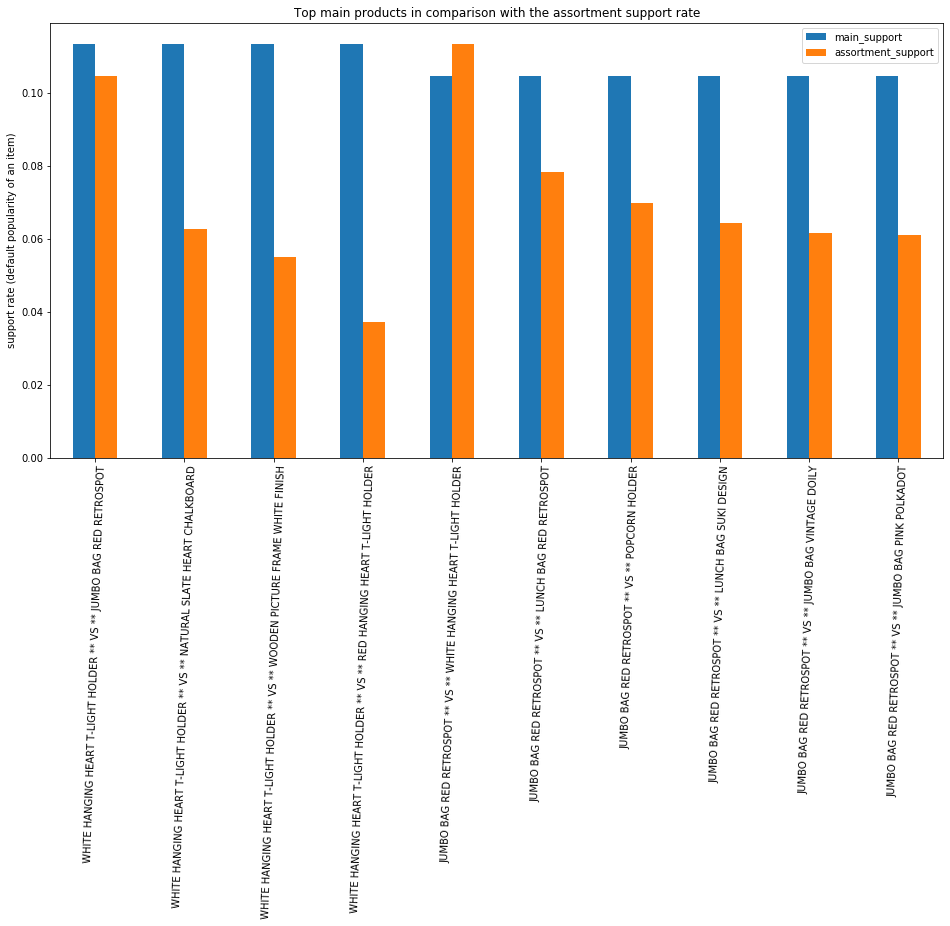

In [227]:
# Compating the main_support with the assortment_support sorted by the main_support rate.

main_assortment_name = rules['main_assortment_merged'].head(10).tolist()

main_support =rules['main_support'].head(10).tolist()
assortment_support =rules['assortment_support'].head(10).tolist()

df = pd.DataFrame({'main_support': main_support,
                   'assortment_support': assortment_support}, index=main_assortment_name)
ax = df.plot.bar(rot=0,title="Top main products in comparison with the assortment support rate",figsize=(16,8))
plt.xticks(rotation=88)
plt.ylabel('support rate (default popularity of an item)');

**The above list includes product categorization (Main and assortment) using the Association Rule Mining via Apriori Algorithm, it generated a list of 196 products sets**

In the above list, I've just showed the top 10 sets of products sets that were purchased together. In it we can see that populat products (top purchased products) were included in many sets. For example, 'WHITE HANGING HEART T-LIGHT HOLDER' went on with many other products.. Same story with the 'JUMBO BAG RED RETROSPOT'. The list mostly includes home decoration products, so many people/businesses bought many of these items, which shows that most of the home decoration stuff gets bought in the same deals.

In [228]:
# Creating a summary table with 'main', 'assortment', 'main_support', 'assortment_support' columns
rules = rules.sort_values(by = ['main_support', 'assortment_support'], ascending= False)
rules['main_support'] = rules['main_support'].map(lambda n: '{:.2%}'.format(n))
rules['assortment_support'] = rules['assortment_support'].map(lambda n: '{:.2%}'.format(n))
print(rules.shape)
rules[['main', 'assortment', 'main_support', 'assortment_support']].head(10)

(196, 10)


,main,assortment,main_support,assortment_support
91,WHITE HANGING HEART T-LIGHT HOLDER,JUMBO BAG RED RETROSPOT,11.35%,10.47%
153,WHITE HANGING HEART T-LIGHT HOLDER,NATURAL SLATE HEART CHALKBOARD,11.35%,6.26%
175,WHITE HANGING HEART T-LIGHT HOLDER,WOODEN PICTURE FRAME WHITE FINISH,11.35%,5.51%
163,WHITE HANGING HEART T-LIGHT HOLDER,RED HANGING HEART T-LIGHT HOLDER,11.35%,3.71%
90,JUMBO BAG RED RETROSPOT,WHITE HANGING HEART T-LIGHT HOLDER,10.47%,11.35%
80,JUMBO BAG RED RETROSPOT,LUNCH BAG RED RETROSPOT,10.47%,7.84%
85,JUMBO BAG RED RETROSPOT,POPCORN HOLDER,10.47%,6.97%
83,JUMBO BAG RED RETROSPOT,LUNCH BAG SUKI DESIGN,10.47%,6.43%
68,JUMBO BAG RED RETROSPOT,JUMBO BAG VINTAGE DOILY,10.47%,6.17%
51,JUMBO BAG RED RETROSPOT,JUMBO BAG PINK POLKADOT,10.47%,6.10%


In [229]:
# Sorting according to the items_set_support and saving the table 
# Dropping duplicated values, so the algorthim shows a dupplicated set values. (Each set is out put twice)
rules_set_support = rules.sort_values(by = ['items_set_support'], ascending= False)
rules_set_support = rules_set_support.drop_duplicates(subset=['items_set_support'])

In [230]:
rules_set_support_table= rules_set_support[['main_assortment_merged','items_set_support']].head(10)
rules_set_support_table

,main_assortment_merged,items_set_support
51,JUMBO BAG RED RETROSPOT ** VS ** JUMBO BAG PIN...,0.041335
28,GREEN REGENCY TEACUP AND SAUCER ** VS ** ROSES...,0.038429
79,JUMBO STORAGE BAG SUKI ** VS ** JUMBO BAG RED ...,0.036274
75,JUMBO SHOPPER VINTAGE RED PAISLEY ** VS ** JUM...,0.034070
141,LUNCH BAG RED RETROSPOT ** VS ** LUNCH BAG SUK...,0.032817
108,LUNCH BAG BLACK SKULL. ** VS ** LUNCH BAG RED...,0.032116
4,ALARM CLOCK BAKELIKE GREEN ** VS ** ALARM CLOC...,0.032066
24,GREEN REGENCY TEACUP AND SAUCER ** VS ** PINK ...,0.031665
133,LUNCH BAG RED RETROSPOT ** VS ** LUNCH BAG PIN...,0.030362
161,PINK REGENCY TEACUP AND SAUCER ** VS ** ROSES ...,0.029961


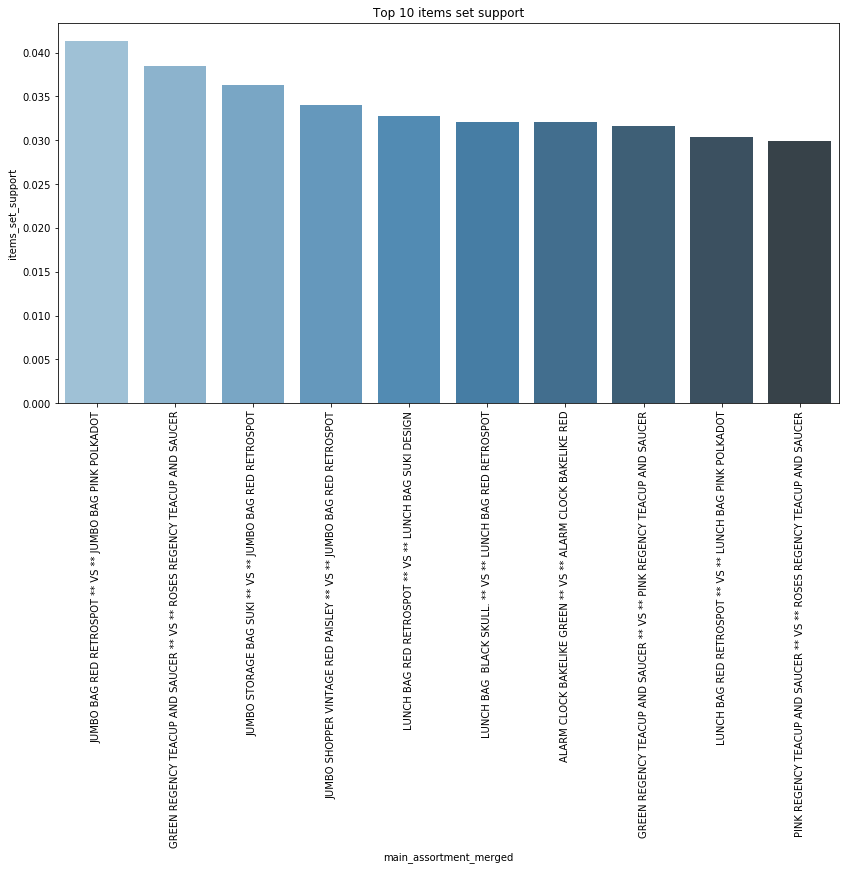

In [231]:
# plotting a barplot to visualize the above list
plt.figure(figsize=(14,7))
ax = sns.barplot(x="main_assortment_merged", y="items_set_support", data=rules_set_support_table,
                 palette="Blues_d")
plt.title("Top 10 items set support")
plt.xticks(rotation=90);

In [232]:
# Sorting according to the 'main_support', 'assortment_support' and saving the table 
# pd.options.display.max_colwidth = 1000
rules_set_support_table['items_set_support'] = rules_set_support_table['items_set_support'].map(lambda n: '{:.2%}'.format(n))
rules_set_support_table.head(10)

,main_assortment_merged,items_set_support
51,JUMBO BAG RED RETROSPOT ** VS ** JUMBO BAG PIN...,4.13%
28,GREEN REGENCY TEACUP AND SAUCER ** VS ** ROSES...,3.84%
79,JUMBO STORAGE BAG SUKI ** VS ** JUMBO BAG RED ...,3.63%
75,JUMBO SHOPPER VINTAGE RED PAISLEY ** VS ** JUM...,3.41%
141,LUNCH BAG RED RETROSPOT ** VS ** LUNCH BAG SUK...,3.28%
108,LUNCH BAG BLACK SKULL. ** VS ** LUNCH BAG RED...,3.21%
4,ALARM CLOCK BAKELIKE GREEN ** VS ** ALARM CLOC...,3.21%
24,GREEN REGENCY TEACUP AND SAUCER ** VS ** PINK ...,3.17%
133,LUNCH BAG RED RETROSPOT ** VS ** LUNCH BAG PIN...,3.04%
161,PINK REGENCY TEACUP AND SAUCER ** VS ** ROSES ...,3.00%


The top item_set_support rate is a basically the count from all orders where these two product set were purchased together. Here are the top list of the items_set_support.
Lot's of bags are bought together.. These top sets are obviously a business purchases.. They probably buy lots of products simultaniously with different bags that look different..

**General conclusion:**

It would be a good idea to reach out to customers and ask them about their customer's demands and prefrences so the ecommerce can adjust their website products 

# Step 4. Formulating and testing statistical hypothesis
Note: After finishing step 3, I will turn the hypothesis into a clear action plan

Let's do it..!

In [233]:
datastats.head(1)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,RefundFlg
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850,False


In [234]:
datastats['RefundFlg'].value_counts()

False    530103
True       9288
Name: RefundFlg, dtype: int64

### **Formulating the hypothesis:**

Does the price of an item effect the customer refund rate?

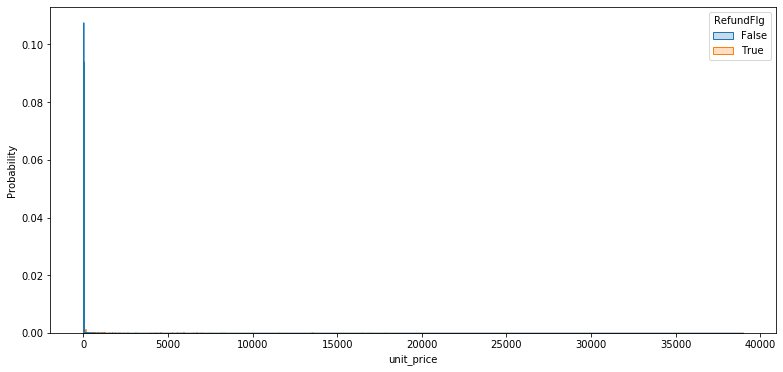

In [235]:
# Plotting a histogram to show the distribution of the products prices
# https://www.kite.com/python/answers/how-to-change-the-seaborn-plot-figure-size-in-python
fig_dims = (13, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(
    datastats, x="unit_price", hue="RefundFlg", element="step",
    stat="probability", common_norm=False,
);

Due to outline in the unit_price, the histogram is not informative, hence I will zoom in and filter the outline so we can see an informative distribution

(0, 30)

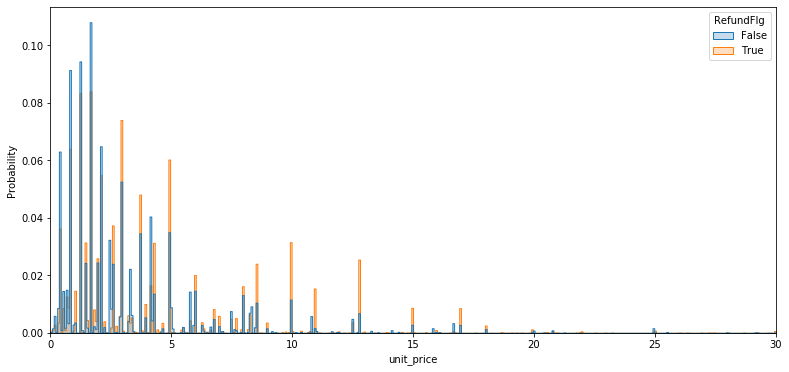

In [236]:
# Visulazining the data after zooming into the unit_price where it's less than 30
fig_dims = (13, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(
    datastats[datastats['unit_price'] <= 30], x="unit_price", hue="RefundFlg", element="step",
    stat="probability", common_norm=False,
)
plt.xlim([0, 30])

The plot shows that the higher the price of the item, the more likely it will be refunded, and the lower the unit price the lower the propability it will be refunded.

Another way of saying the same, is that refunded items tend to have higher prices than non refunded items.

### Implementing the suggested hypotheses into a two-sample t test

In order to compare the average prices are different between refunded vs non-refunded orders, we can use the t-test for independent samples. 

Null hypothesis (H0): There is no difference in average unit_price between the item that were refunded and those that were not

Alternative hypothesis (H1): There is difference in average unit_price between the item that were refunded and those that were not

In [237]:
# Creating samples for the t-test
refunded = datastats[(datastats['RefundFlg'] == True) & (datastats['unit_price'] <= 30)]
non_refunded = datastats[(datastats['RefundFlg'] == False) & (datastats['unit_price'] <= 30)]

In [238]:
print(refunded['unit_price'].min())
refunded.isnull().sum()

0.01


invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
RefundFlg       0
dtype: int64

In [239]:
print(non_refunded['unit_price'].min())
non_refunded.isnull().sum()

0.001


invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
RefundFlg       0
dtype: int64

In [240]:
print('Sample size:', len(refunded), len(non_refunded))
print('Sample means: ', np.mean(refunded['unit_price']), np.mean(non_refunded['unit_price']))
print('Difference in mean:', np.mean(refunded['unit_price']) - np.mean(non_refunded['unit_price']))

alpha = .05 
difference_in_avg_unit_price =  st.ttest_ind(refunded['unit_price'], non_refunded['unit_price'])

print('p-value: ', difference_in_avg_unit_price.pvalue )
if (difference_in_avg_unit_price.pvalue >= alpha):
        print("There is no difference in average unit_price between the item that were refunded and those that were not")
else:
        print("There is difference in average unit_price between the item that were refunded and those that were not")

Sample size: 8938 528418
Sample means:  4.097330498993204 3.2204253526480007
Difference in mean: 0.8769051463452029
p-value:  2.246735865229379e-134
There is difference in average unit_price between the item that were refunded and those that were not


The t-test seem to confirm the hypothesis, which is that refunded items tend to have higher prices than non refunded items.

This bring us to the idea that cheap products might not be refunded but it might lead to bad expereince, this should be reserached further by future analysis.

<div class="alert alert-block alert-warning">

Since your data is not distributed normally, I'd recommend using Mann-Whitney here)

</div>


# Step 5. General conclusion

**General statement:**
   
**The business should note the following points and recommendations:**

**1. Improve the data quality and minding:**

    a. The business should fix the missing customer_id for all of the invoices by comunicating to the data managers.  
    
    b. The data team should uniform the description of the products (for better future product range analysis insights)

**2. Data and bookkeeping issues:**

    a. The bookkeeper should note the invoices where unit_price equals to 0
    
    b. The bookkeeper should note the invoices where description states "Adjust bad debt" or stock_code equals "B" 

**3. Refunded orders:** the refunded (cancelled) items orders share from the overall total orders is still miniscule, around 2%. However, to improve the customer experience and reduce churn rate, I recommend the business to look into the refunded orders. They can start with the top %refunded 30 list that I provided above

**4. Improving marketing performance:** The marketing team should adjust their marketing campaigns according to the customer surf hours and the hours and events where customer place their orders most frequently

**5. Targeted clients:** Top repurchased products by customers section to understand the current business model the business have, so the business can plan to the future targeted potenital clients. Here's a summary:

It should be noted that should note that the ecommerece business seem not only work as B2C, but also B3B as the "WHITE HANGING HEART T-LIGHT HOLDER" and "JUMBO BAG RED RETROSPOT" was repurchased so many times. 

    The ecommerce business have two types of customers:
    
    a. Regular people (B2C): One time product purchase customers, they are searching and trying out products
    
    b. Businesses(B2B): Repurchase again and again customers, They know what they want and they are satisfied and will keep buying again for personal or business needs

**6. Revenue:** The sales is positively related to the "Orders timeframe analysis", and this section should be discussed with the marketing team, the revenue is just the result of the business. - See more into this in the Dashboards.

**7. Product categorization:** The business should go over the categorized product sets (Main and assortment) which was conducted using the Association Rule Mining via Apriori Algorithm, it generated a list of 196 products sets. The business should go over them and understand the demand behind them. I suggest that they talk to their most popular business customers so the can understand their needs.

**8. Statistical hypothesis**  The t-test seem to confirm the hypothesis, which is that refunded items tend to have higher prices than non refunded items. This bring us to the idea that cheap products might not be refunded but it might lead to bad expereince, this should be reserached further in future analysis.

# Presention

Dashboard: <[LINK TO PRESENTATION](https://drive.google.com/file/d/1wnjwfraQJljkMEKvDOPOylCpFmpZVVlT/view?usp=sharing)>

# Dashboard

Dashboard: <[LINK TO DASHBOARD](https://public.tableau.com/profile/elias.bitar#!/vizhome/SalesAnalysis_16104748908680/EcommerceAnalysisDashboard)>

# Refrences and sources (documentation, articles)


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html

---
https://stackabuse.com/association-rule-mining-via-apriori-algorithm-in-python/


---

https://jamesrledoux.com/code/group-by-aggregate-pandas

---


https://www.geeksforgeeks.org/apriori-algorithm/

---

https://analyticsindiamag.com/hands-on-guide-to-market-basket-analysis-with-python-codes/

---
https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm

---

https://clootrack.com/knowledge_base/what-is-product-category-analysis-and-why-is-it-important/


---

https://pbpython.com/market-basket-analysis.html


---

https://www.kite.com/python/answers/how-to-change-the-seaborn-plot-figure-size-in-python
